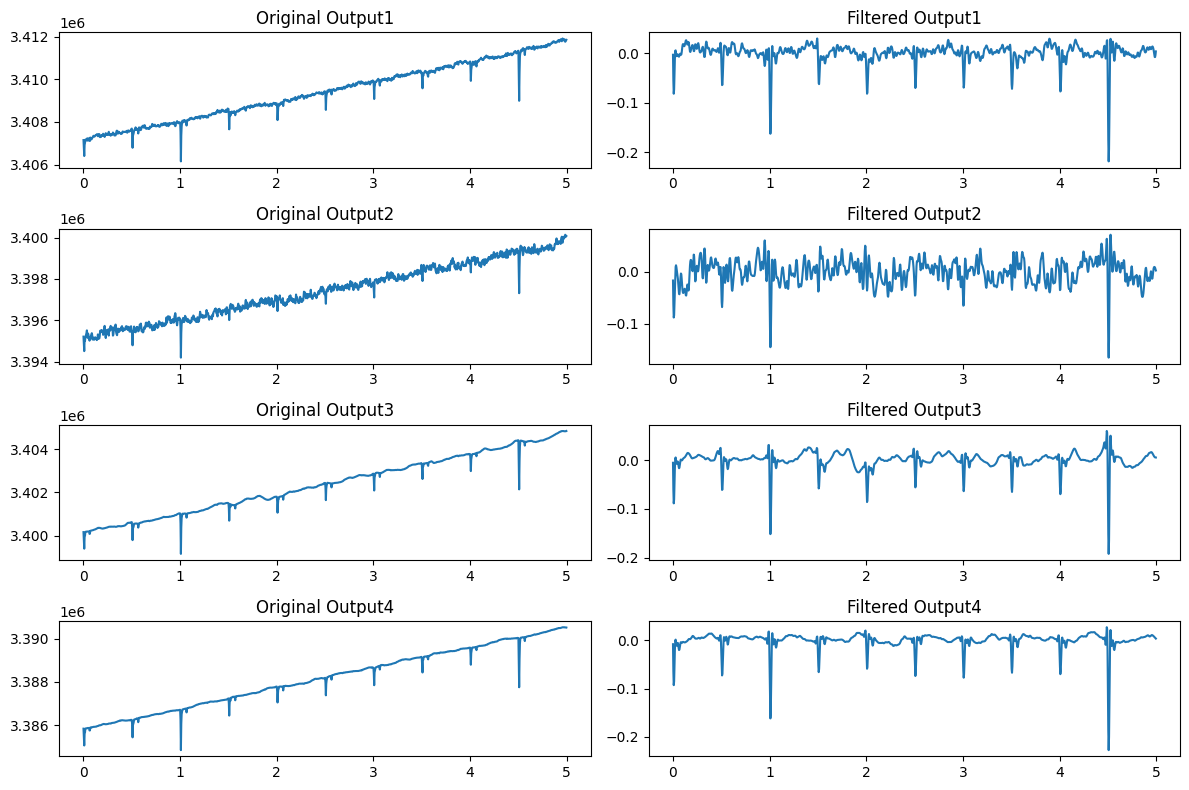

In [23]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_excel(r'C:\Users\lavin\OneDrive\Documents\CurrentStudy\sub-P001\ses-S001\eeg\0.xlsx')
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the DataFrame
normalized_data = scaler.fit_transform(df)

# Create a new DataFrame with the normalized data
normalized_df= pd.DataFrame(normalized_data)
# Function to create a Butterworth band-pass filter
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Function to apply the filter
def apply_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data, axis=0)
    return y

# Filter parameters
fs = 256  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Apply band-pass filter to each channel
filtered_data = apply_filter(normalized_data, lowcut, highcut, fs)
final_df=pd.DataFrame(filtered_data)
# Plot original and filtered data for each channel
time = np.arange(filtered_data.shape[0]) / fs  # Time vector

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 2, 2*i-1)
    plt.plot(time, df[column])
    plt.title(f'Original {column}')
    plt.subplot(4, 2, 2*i)
    plt.plot(time, filtered_data[:, i-1])
    plt.title(f'Filtered {column}')

plt.tight_layout()
plt.show()

In [24]:
signal=final_df[0]
print(signal)


0      -0.003188
1      -0.055619
2      -0.081804
3      -0.073268
4      -0.042684
          ...   
1275   -0.003904
1276   -0.007719
1277   -0.007830
1278   -0.003596
1279    0.003542
Name: 0, Length: 1280, dtype: float64


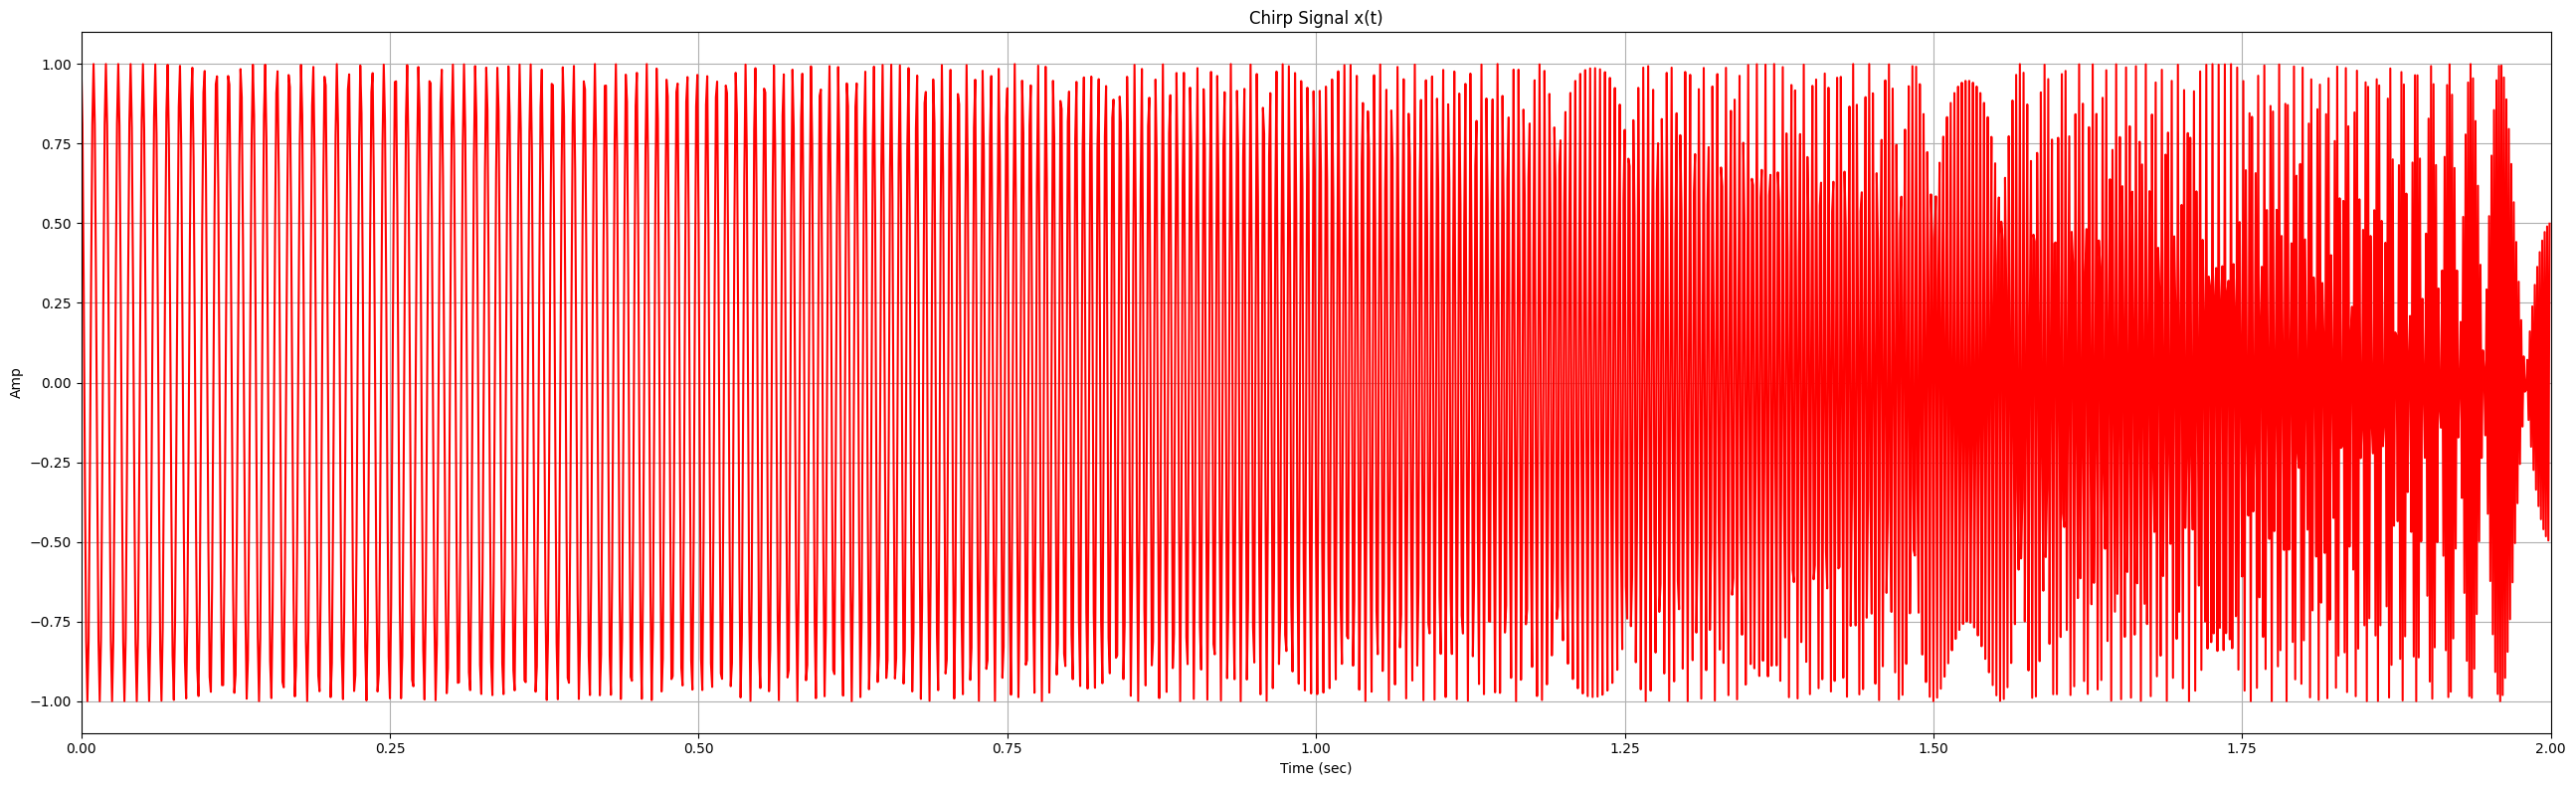

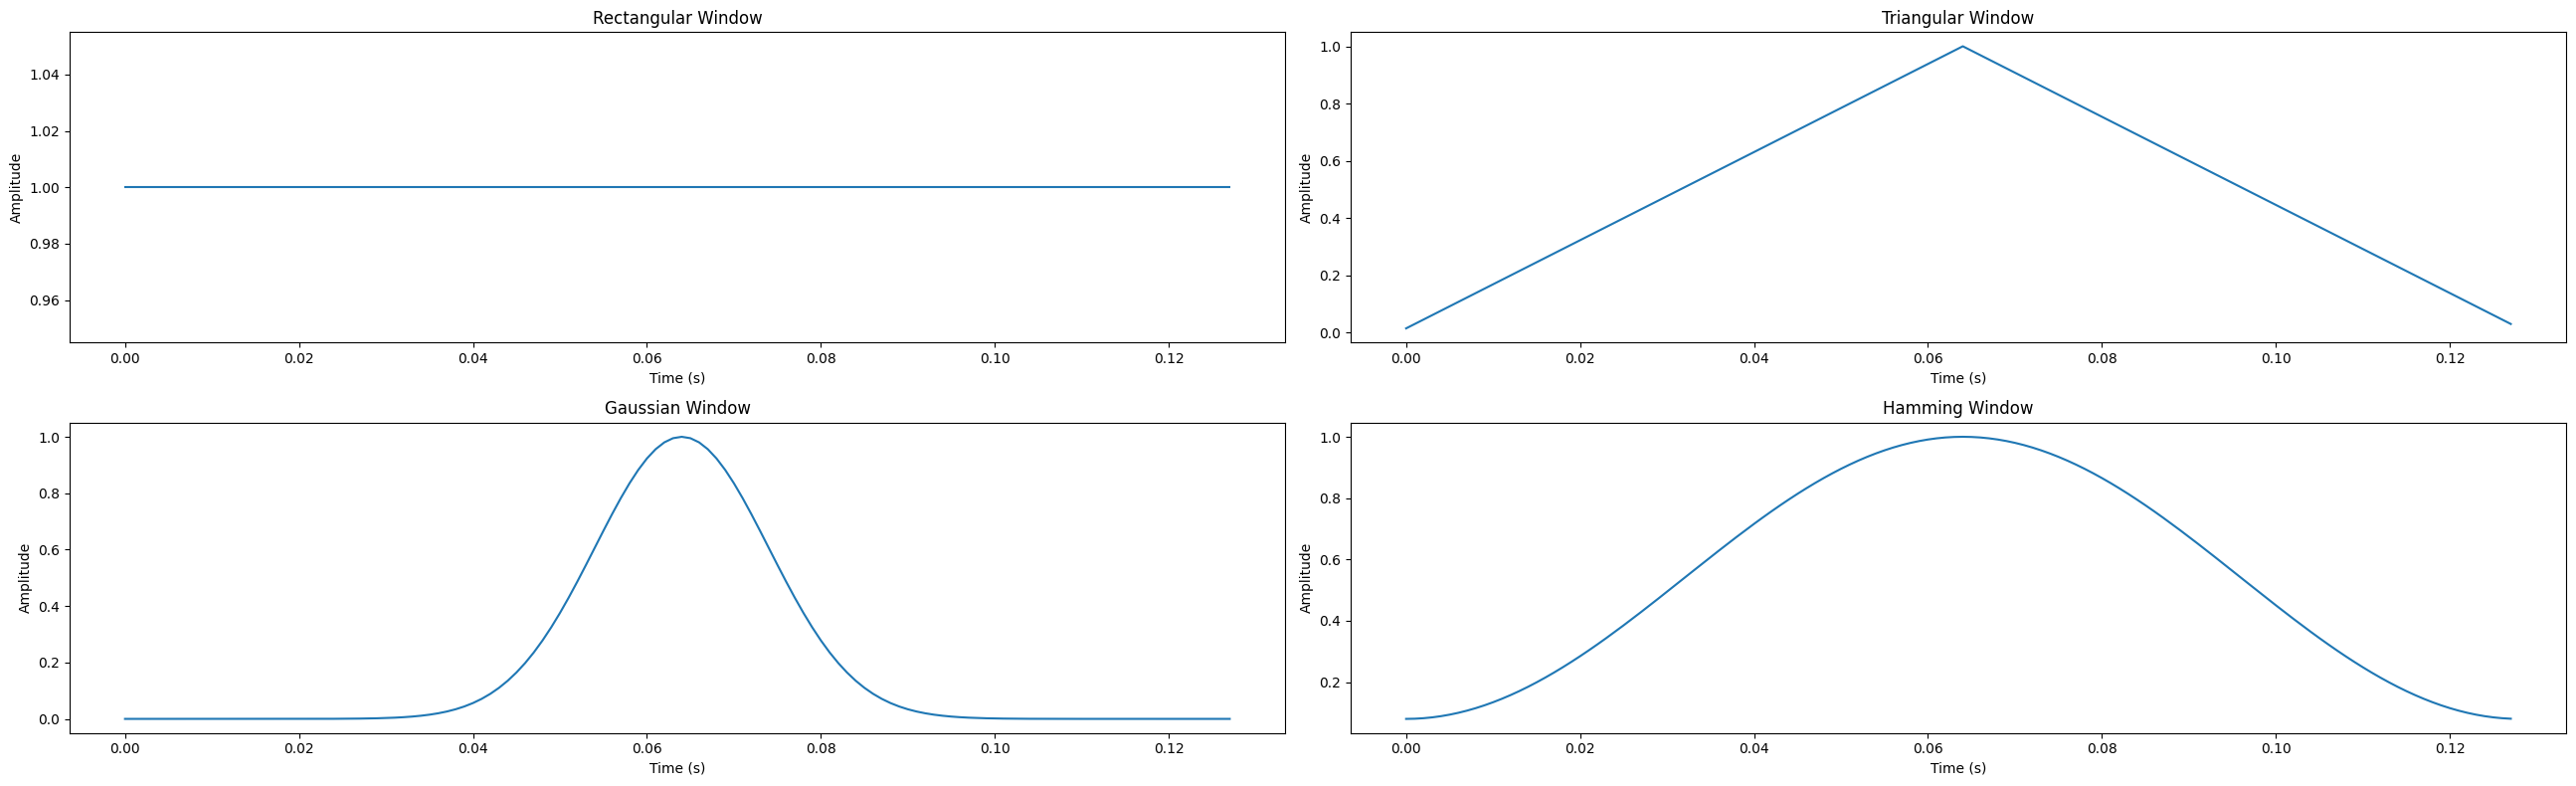

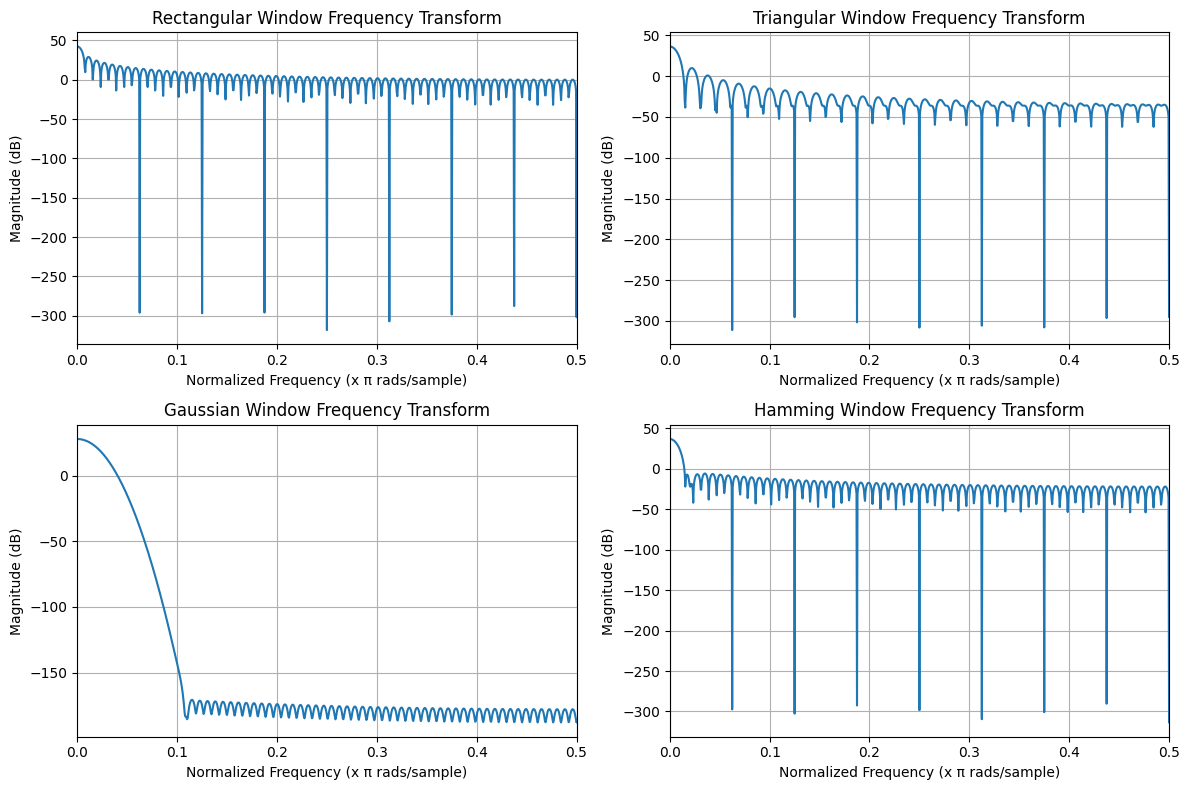

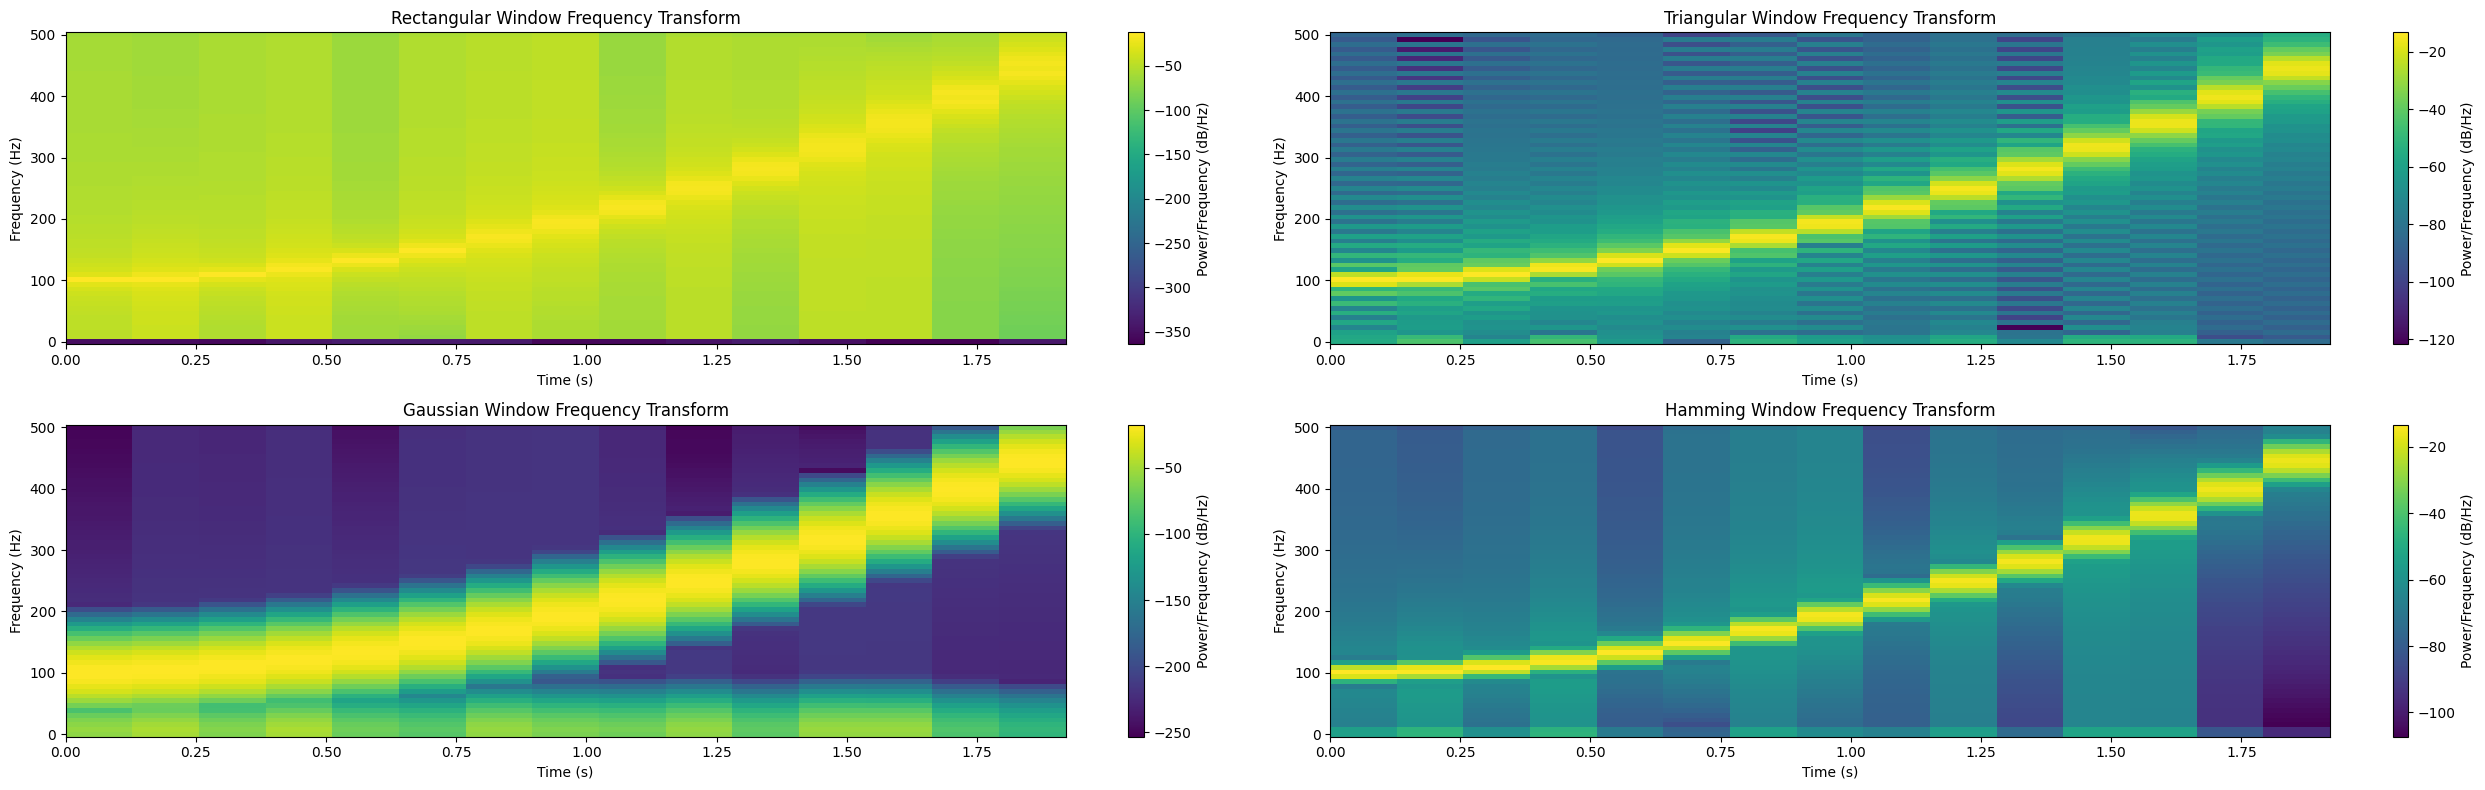

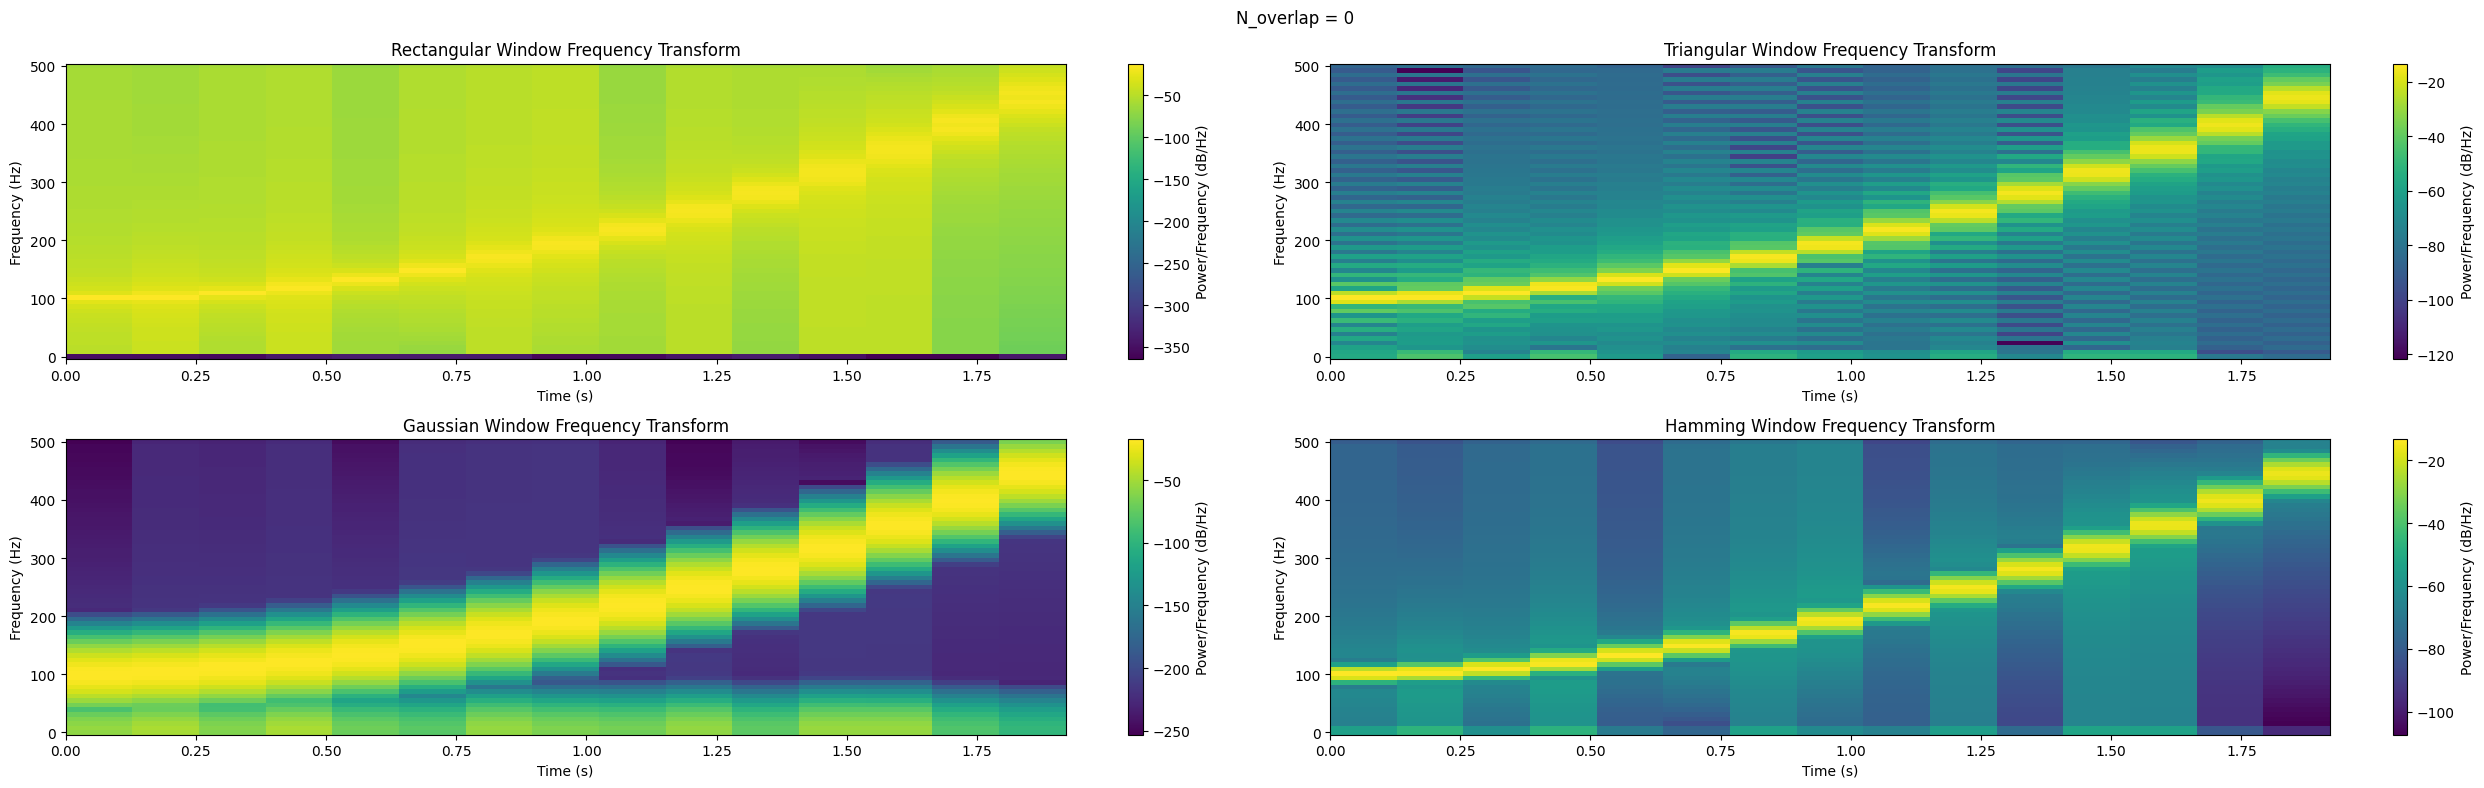

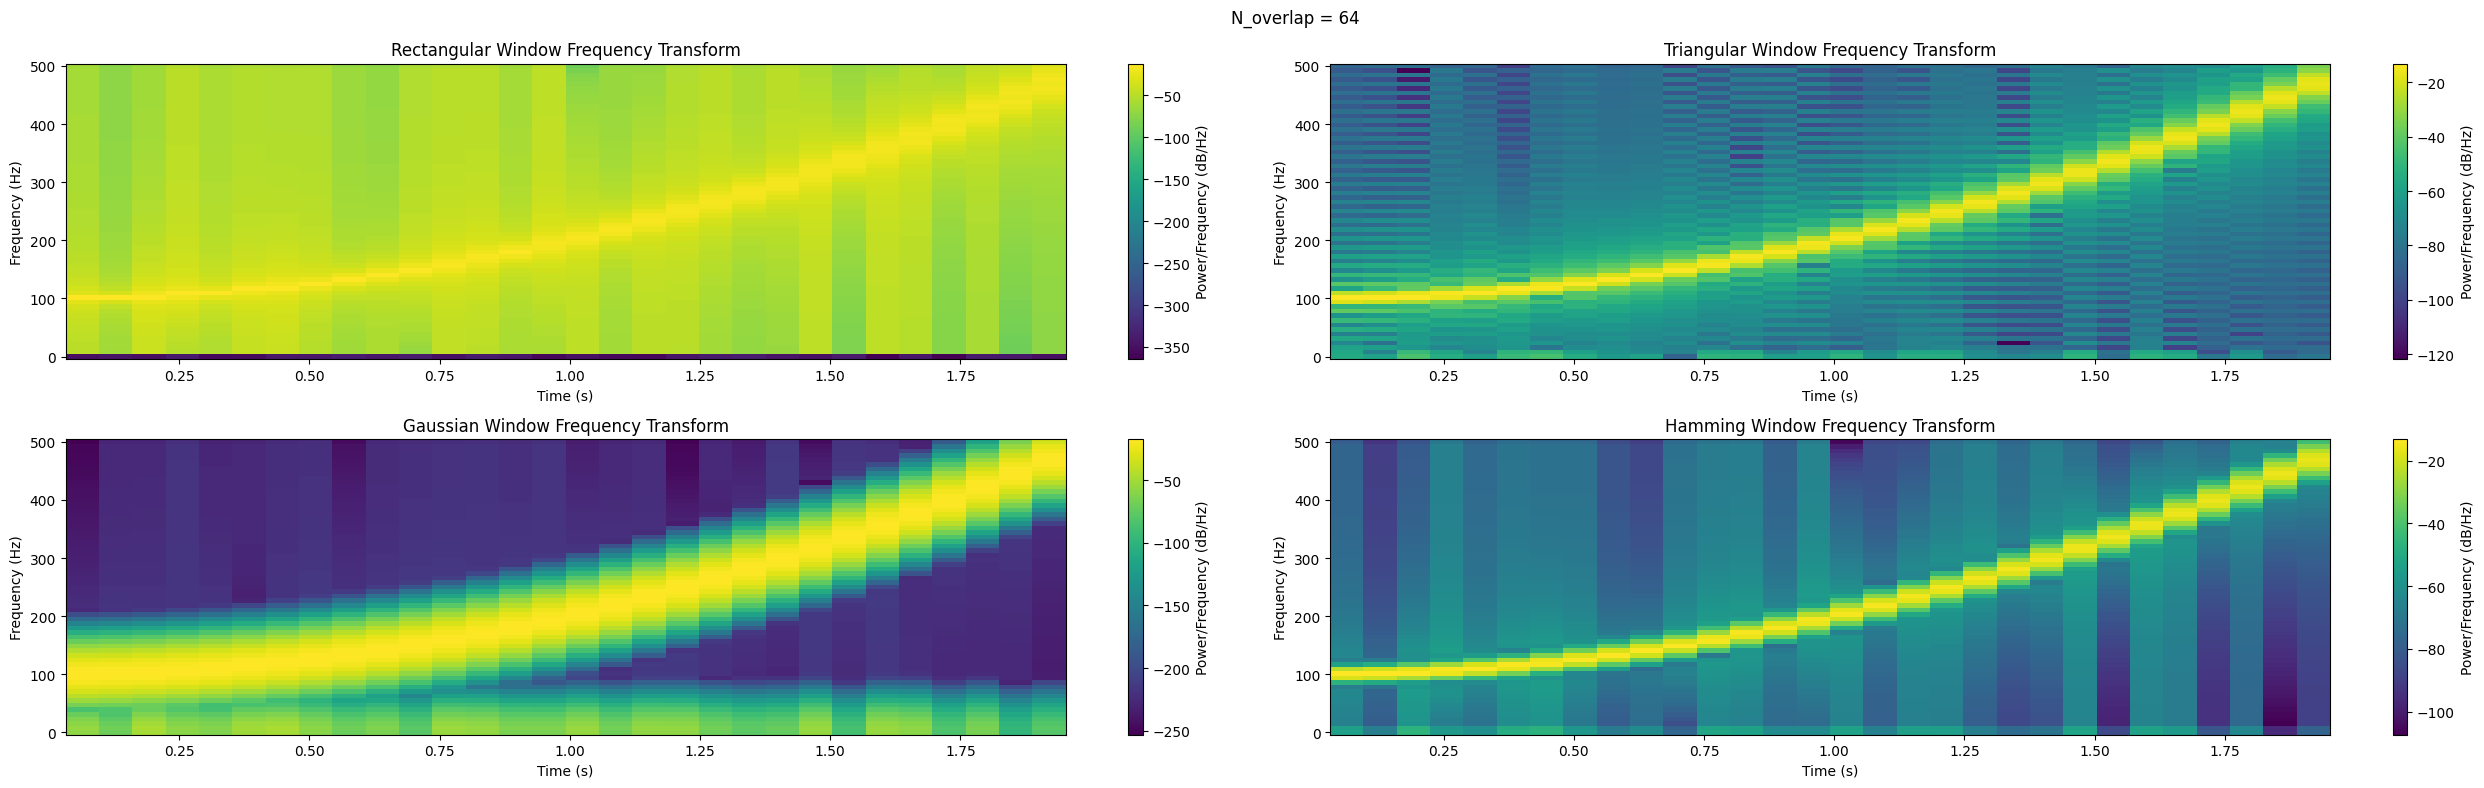

C:\Users\lavin\AppData\Local\Temp\ipykernel_9544\4204198811.py:137: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


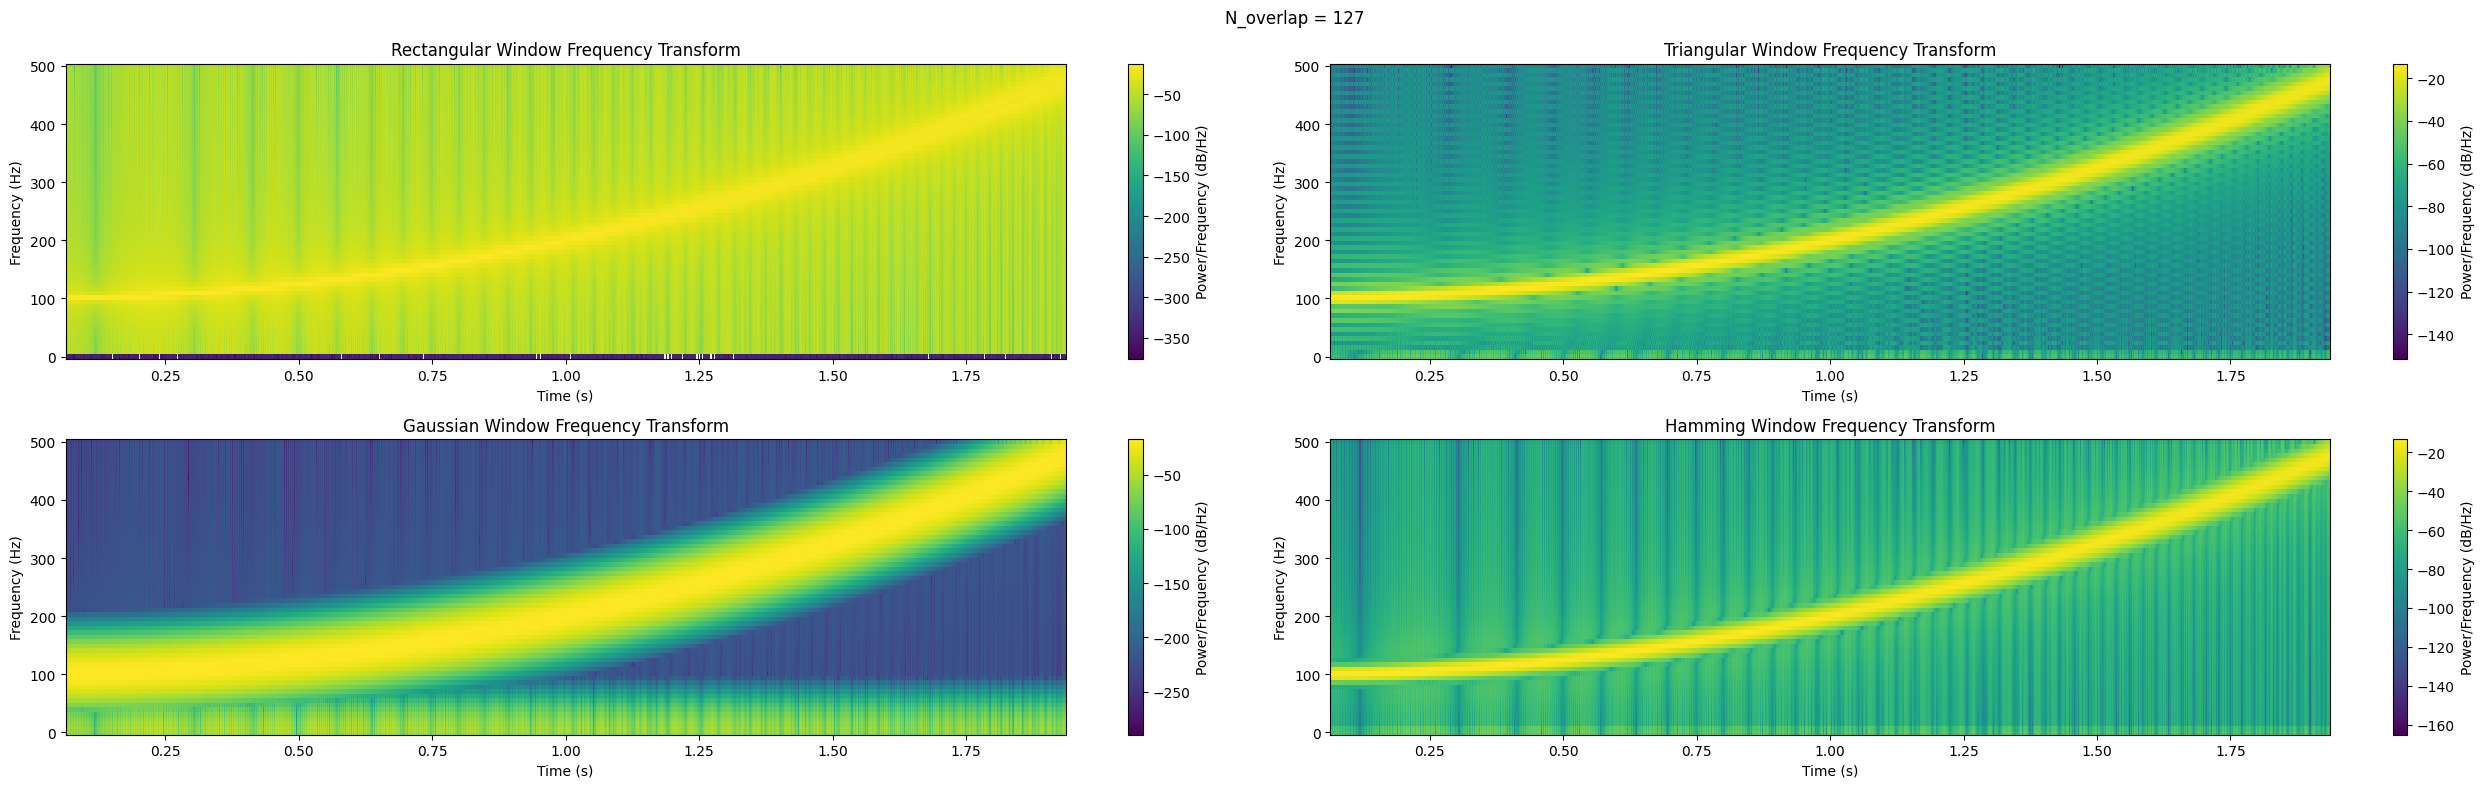

C:\Users\lavin\AppData\Local\Temp\ipykernel_9544\4204198811.py:184: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


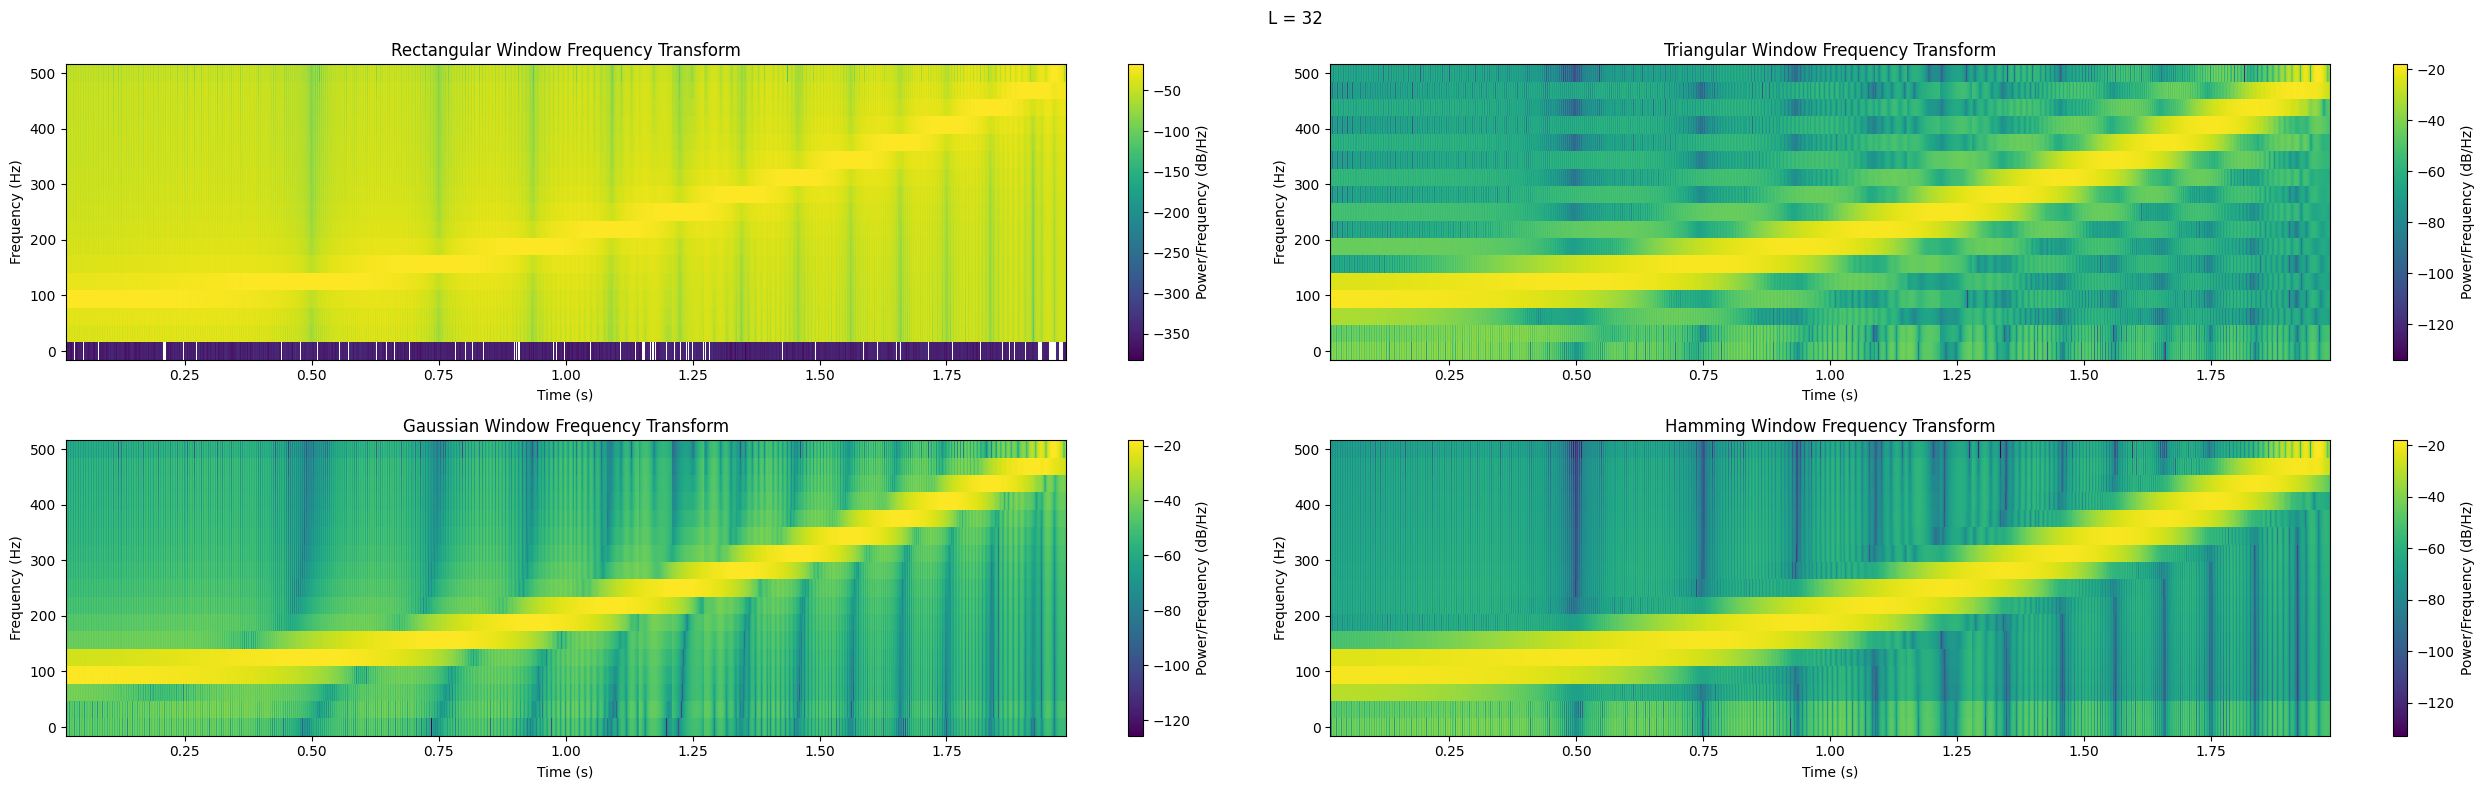

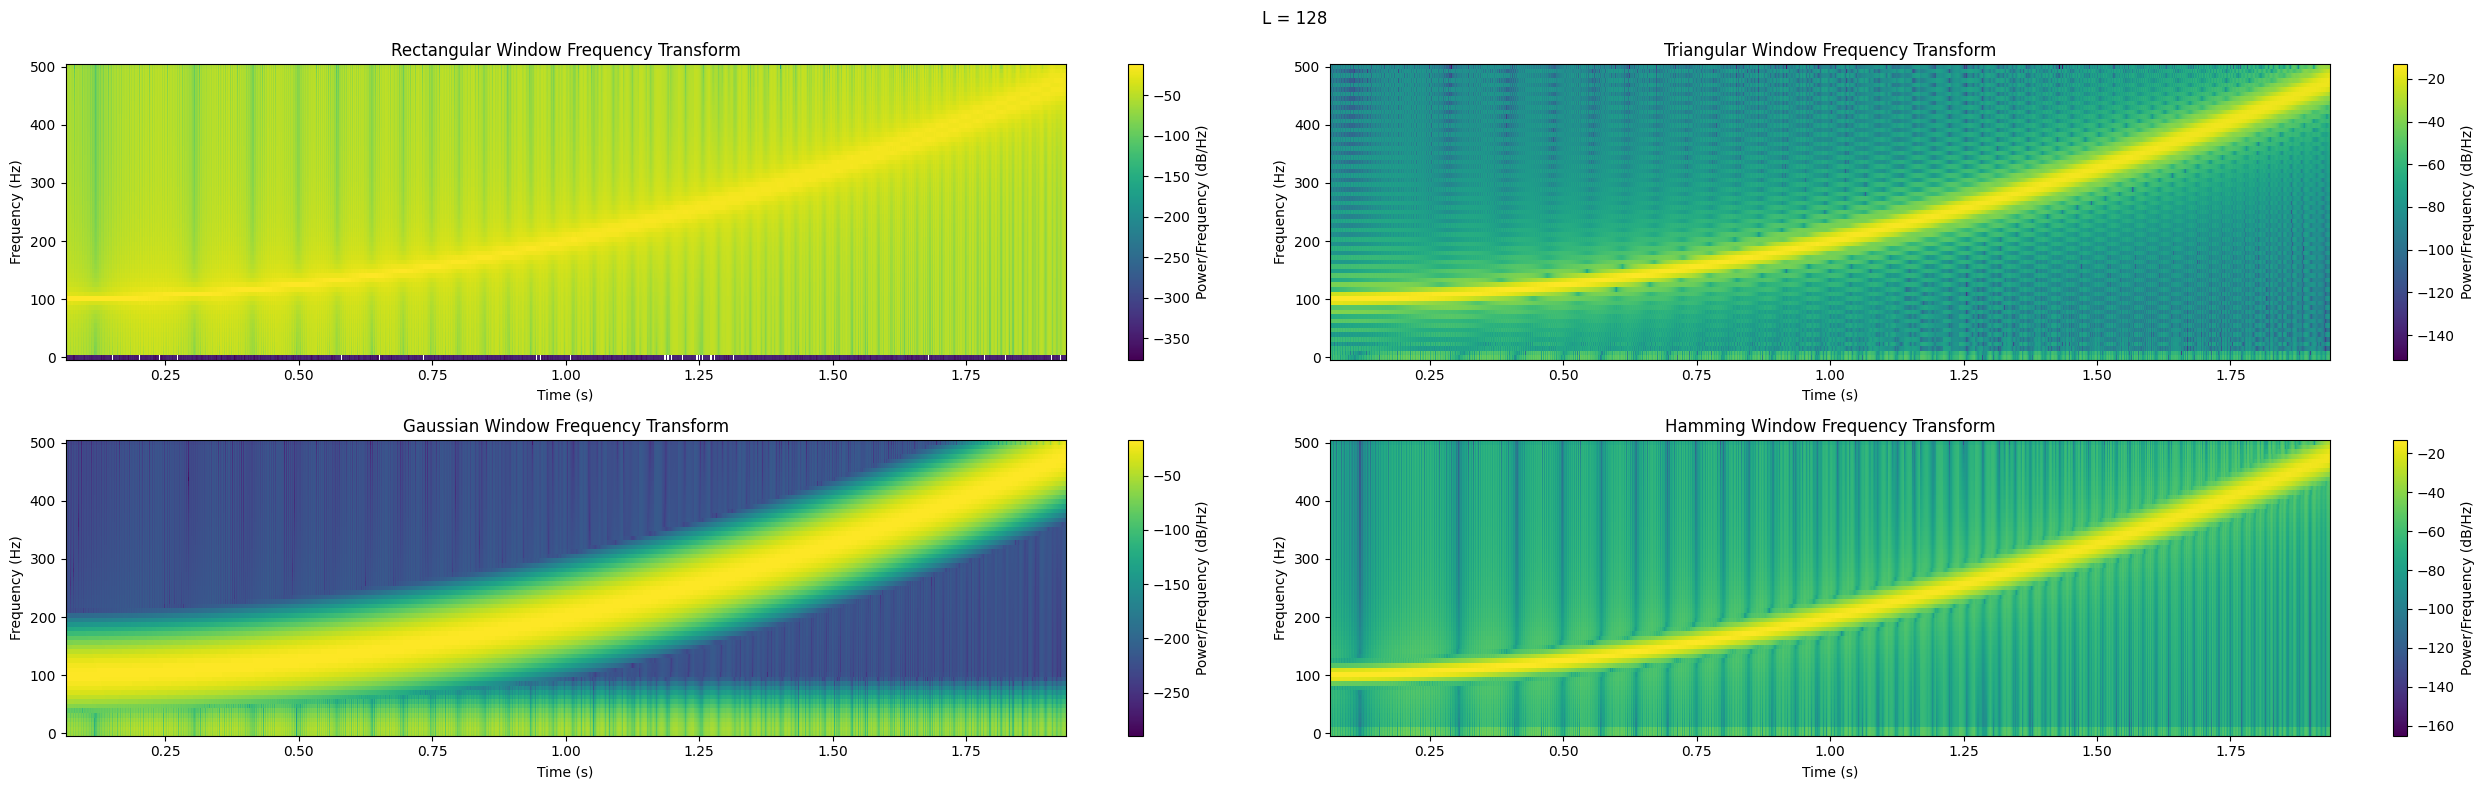

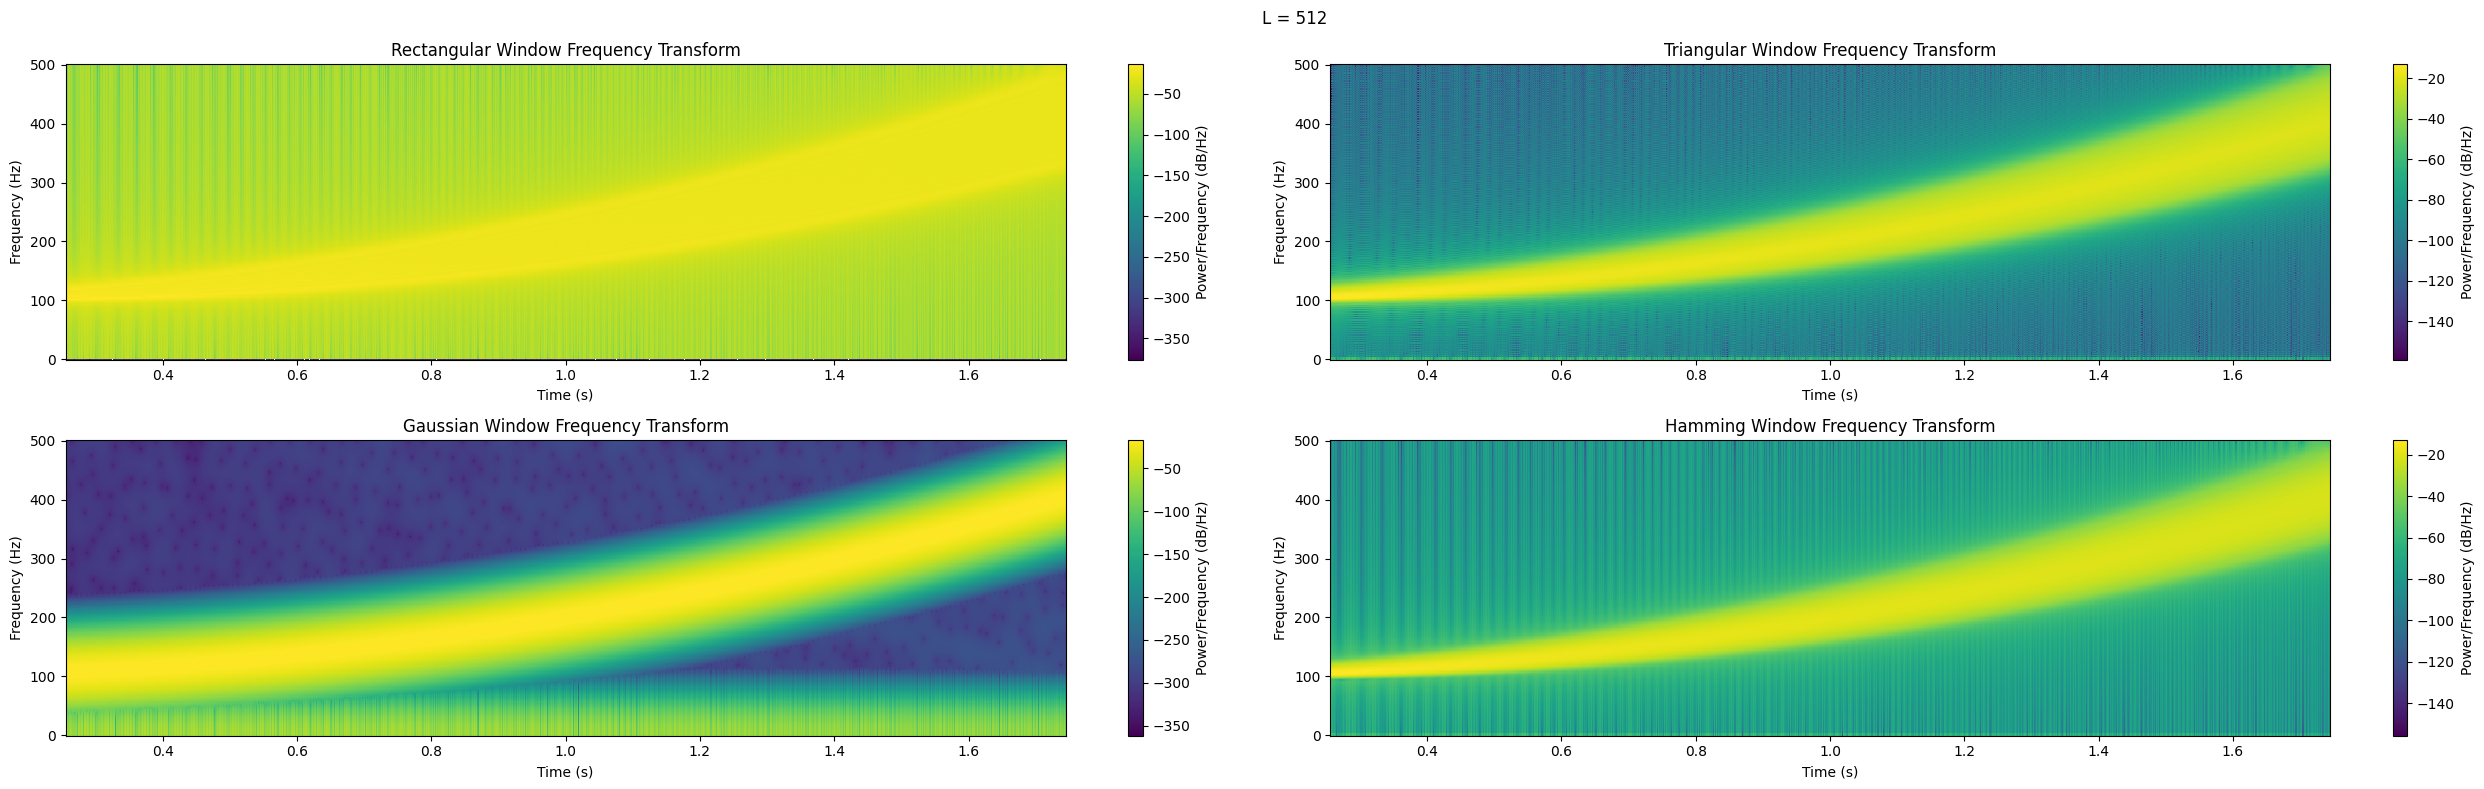

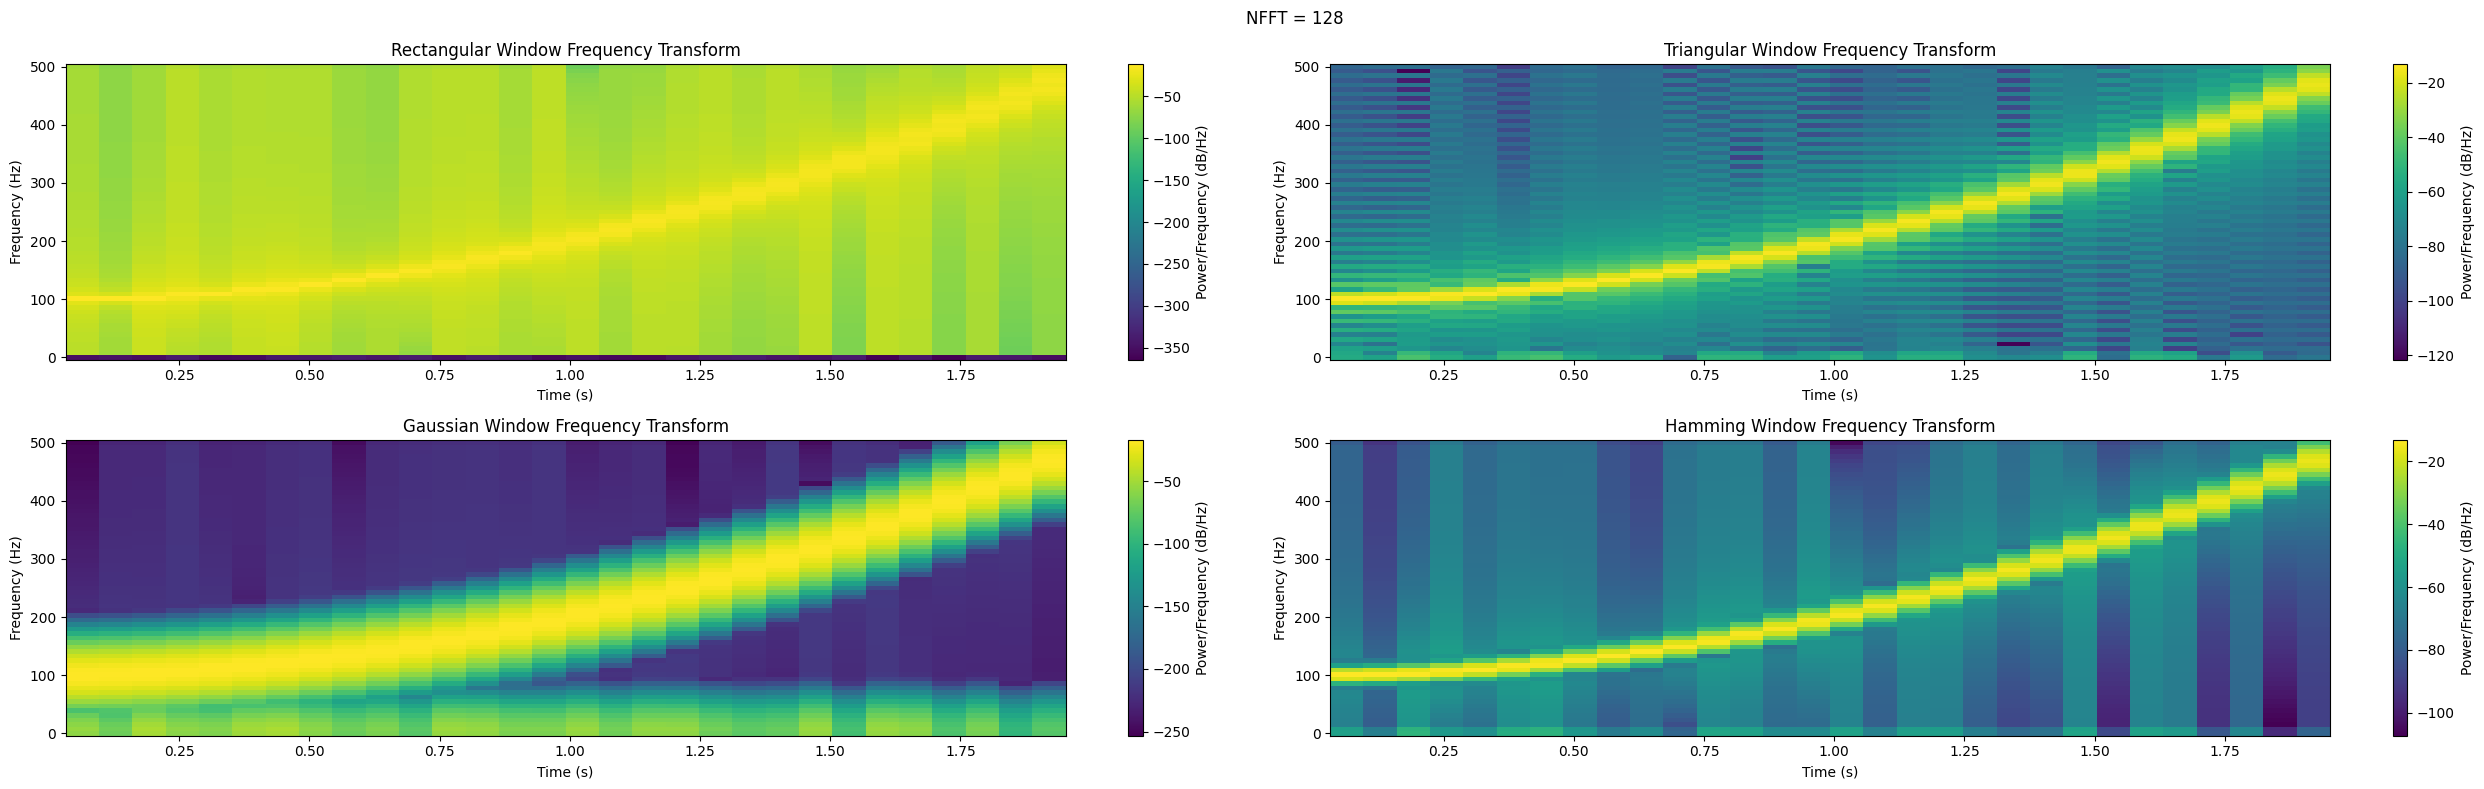

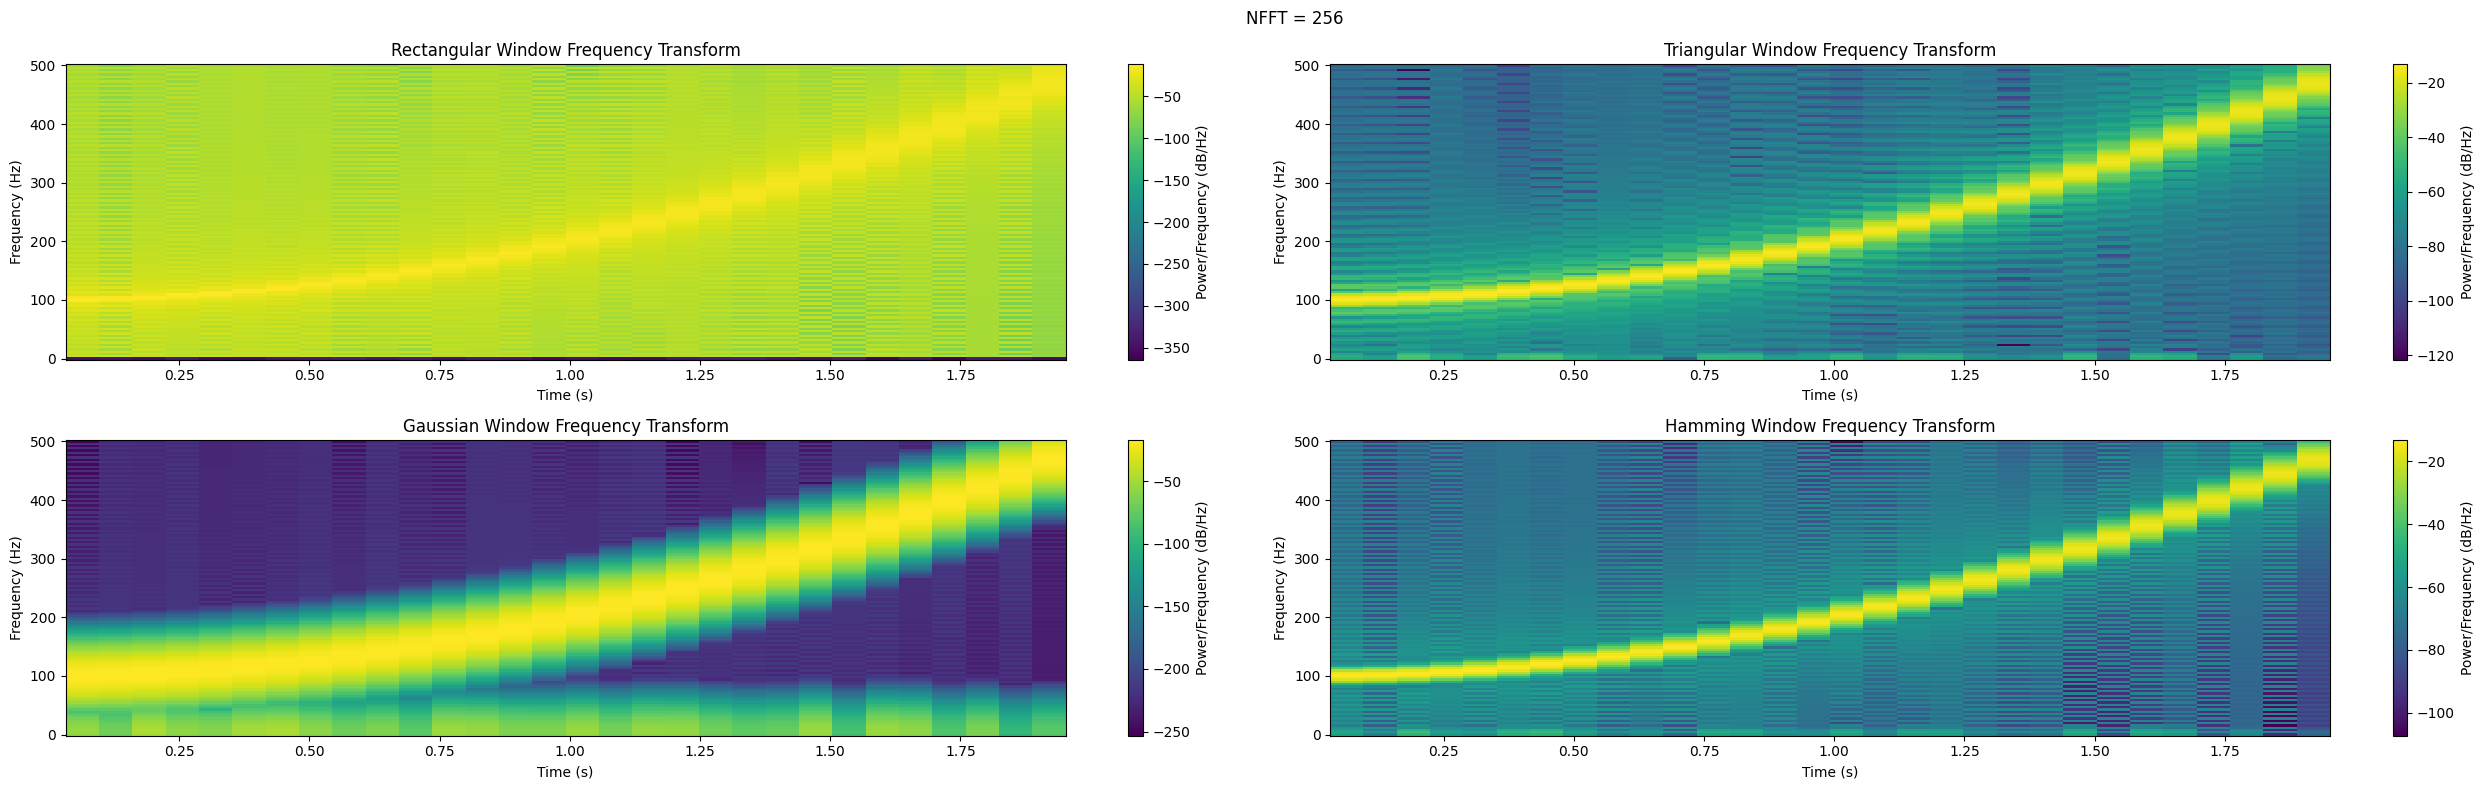

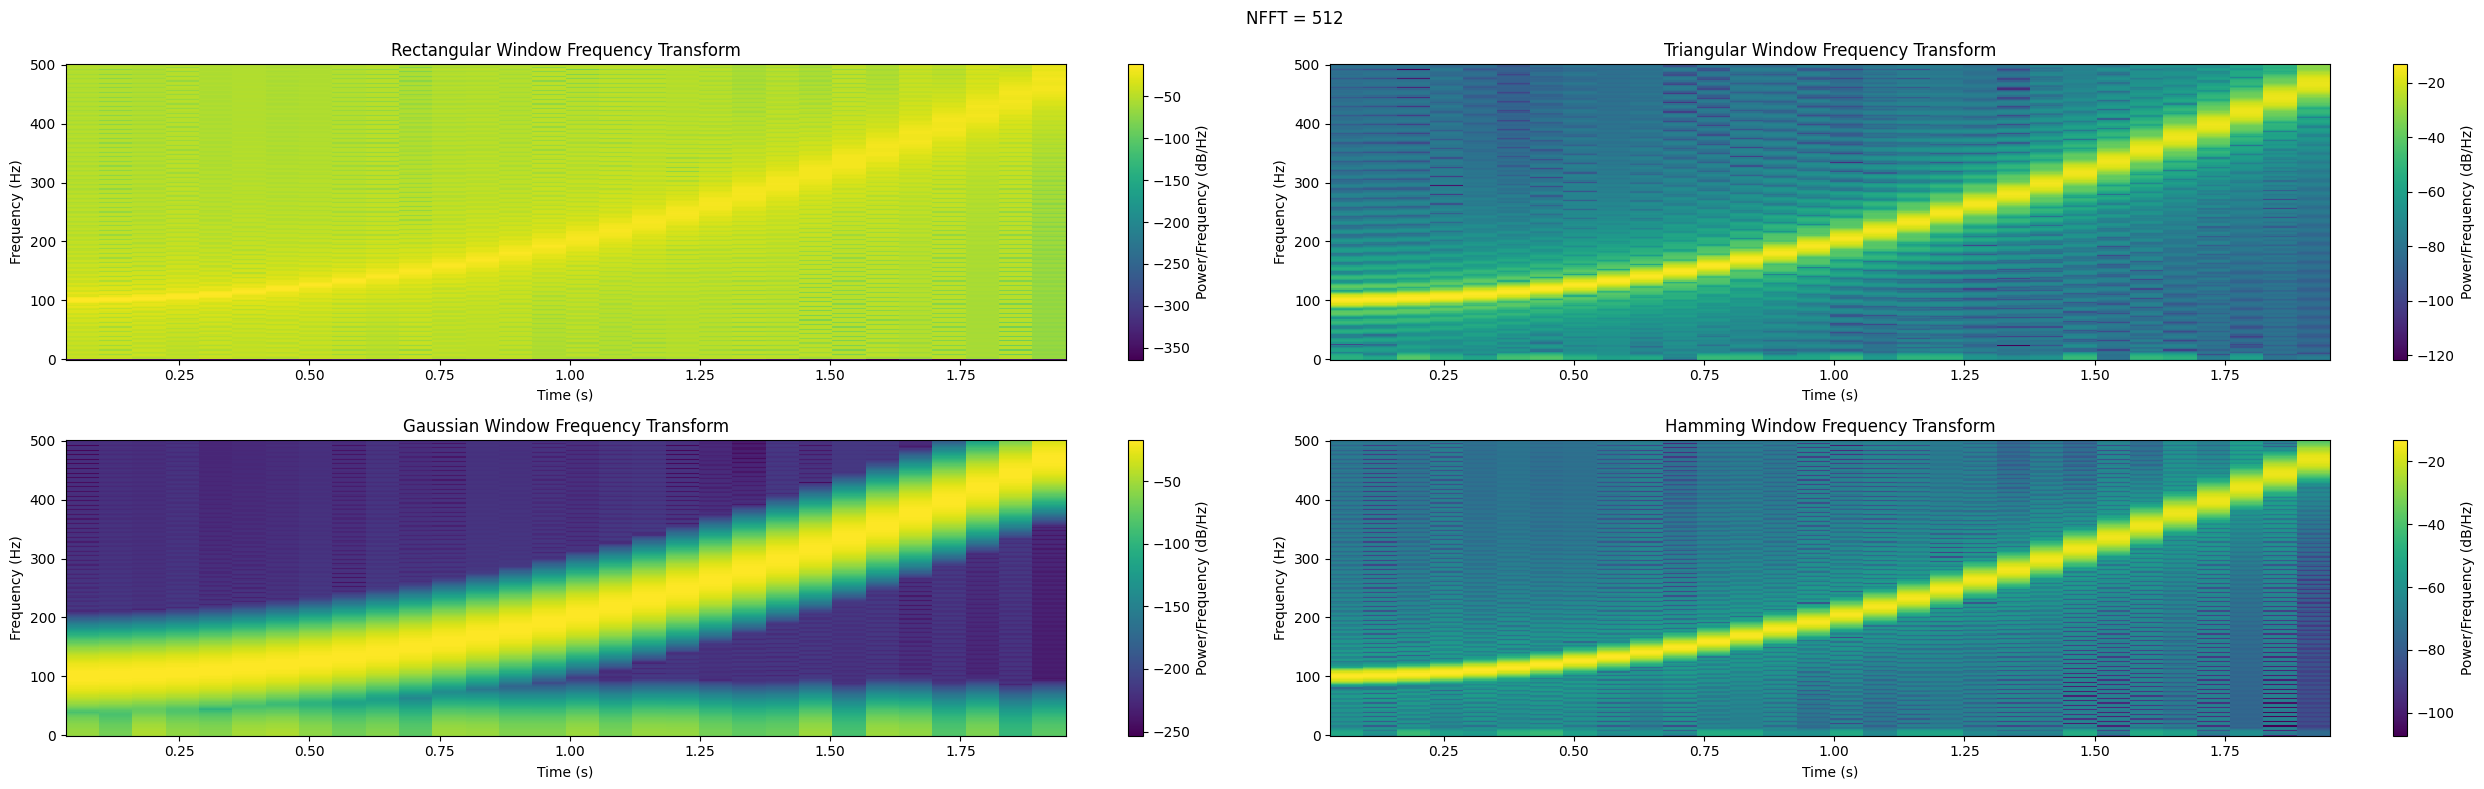

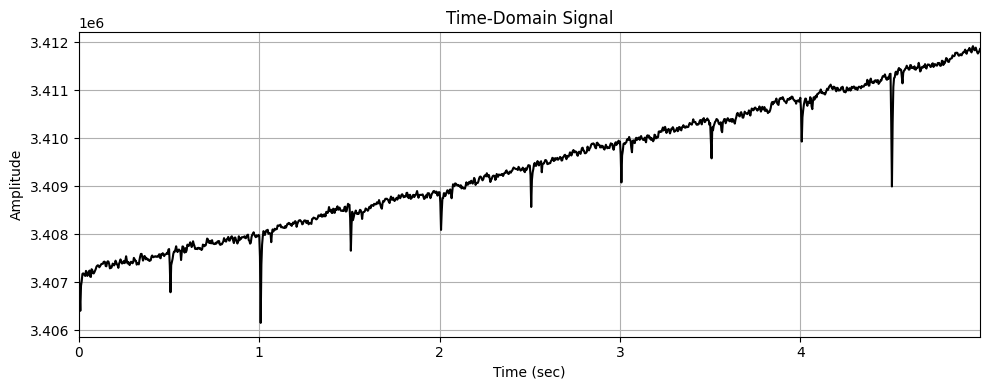

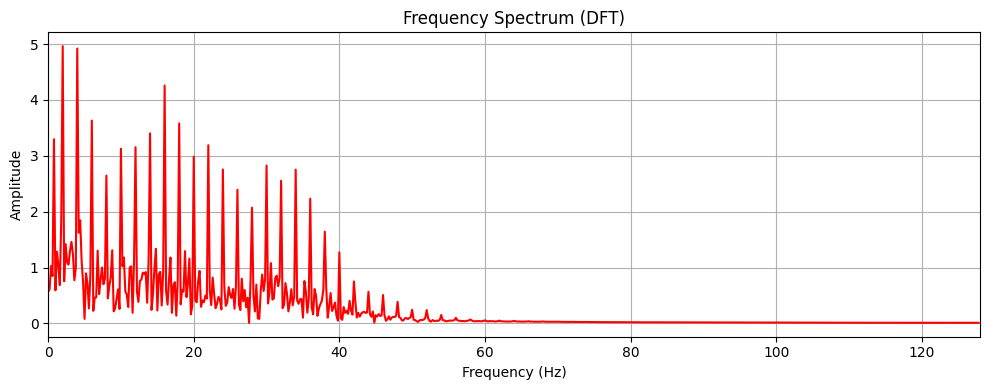

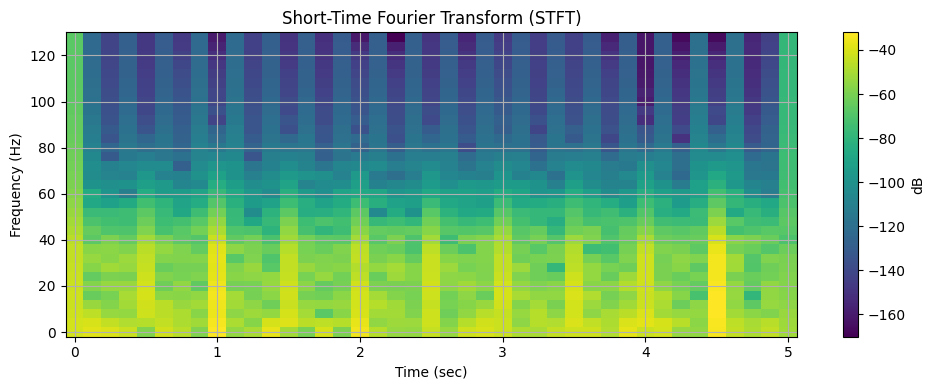

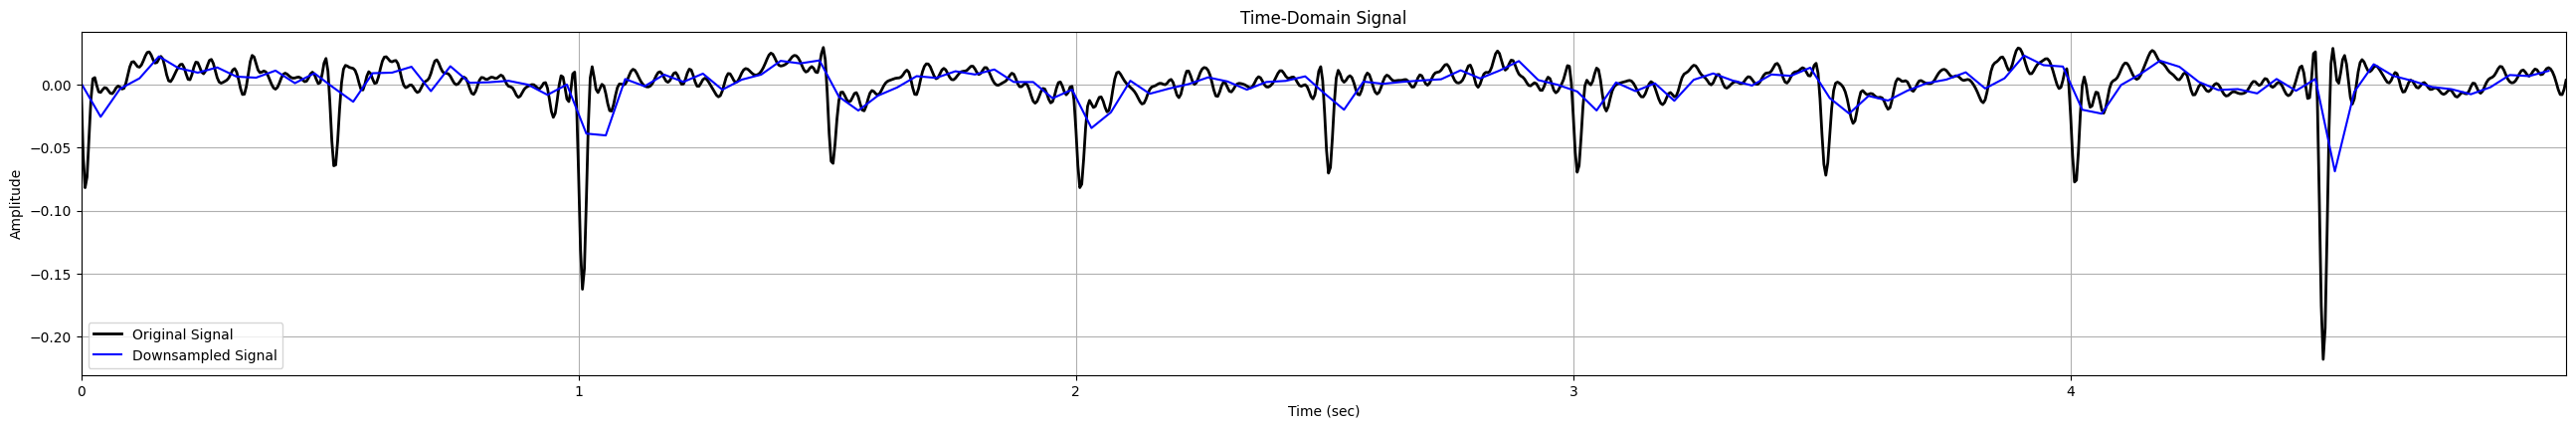

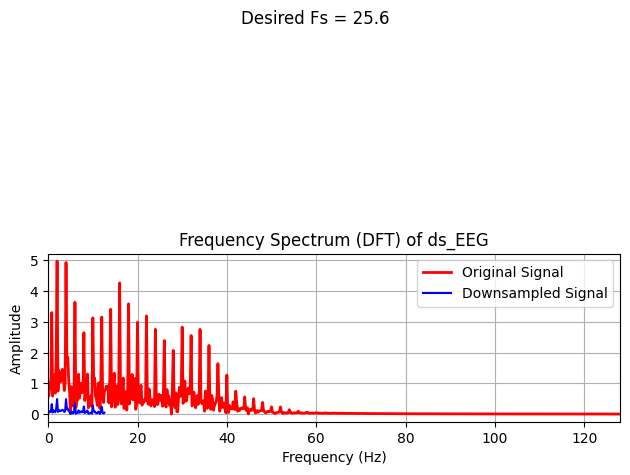

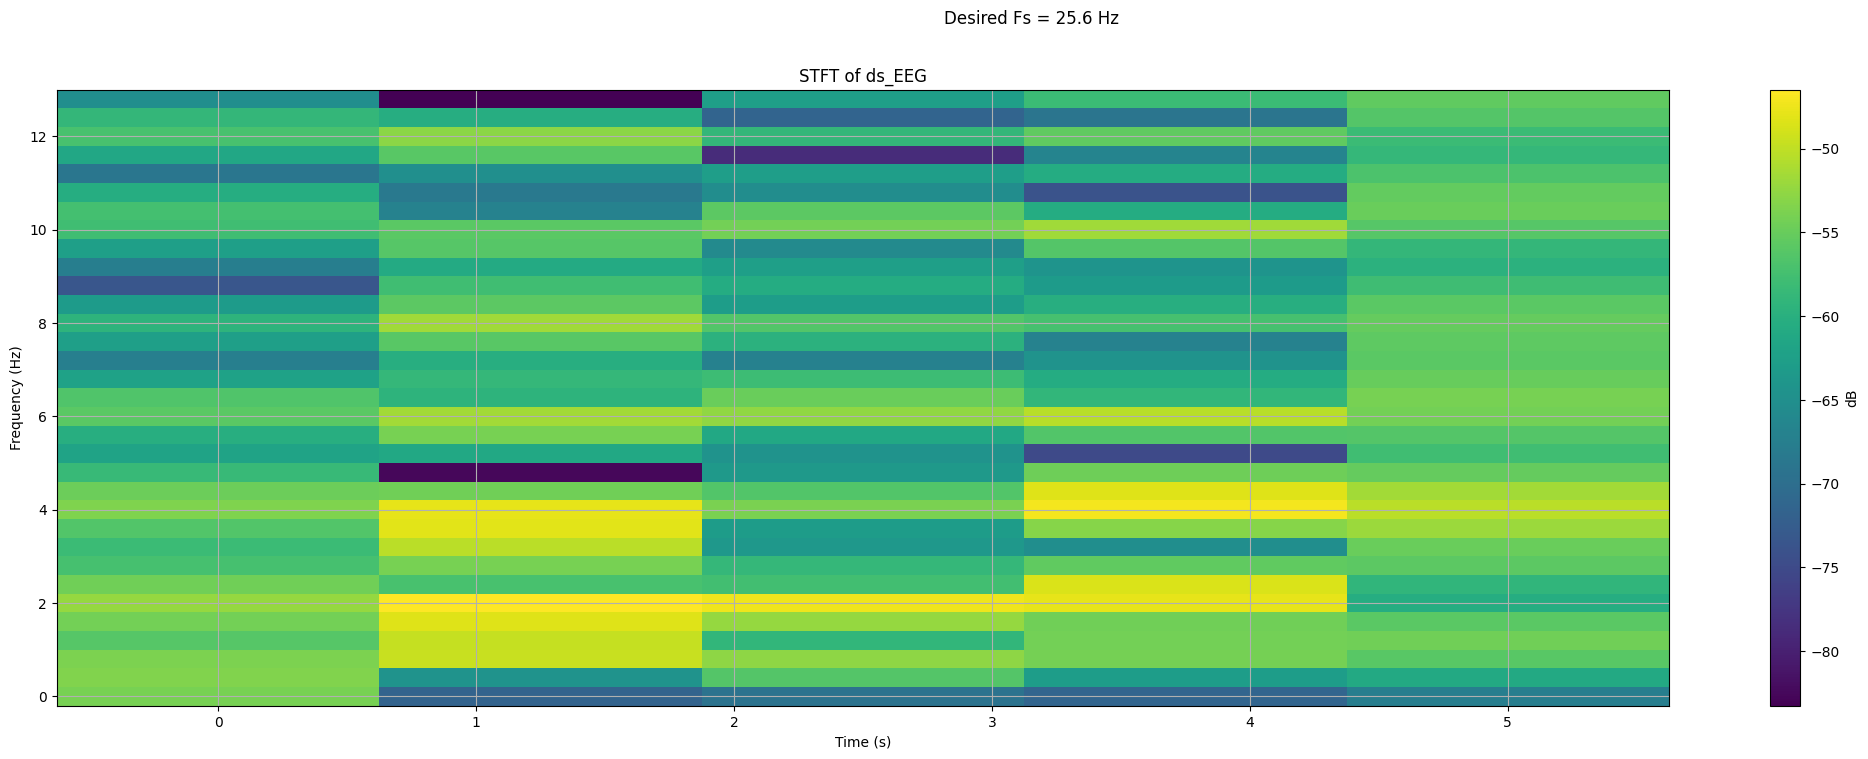

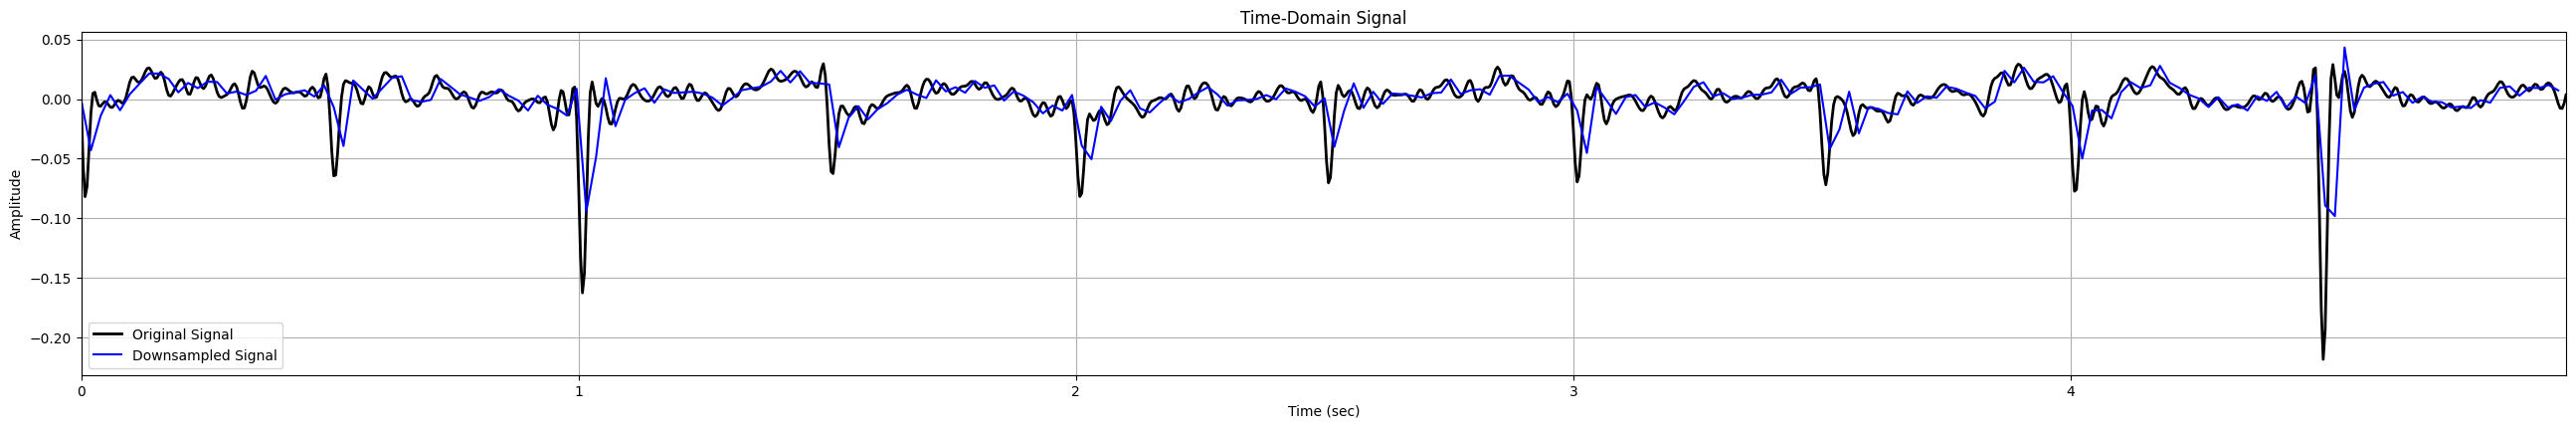

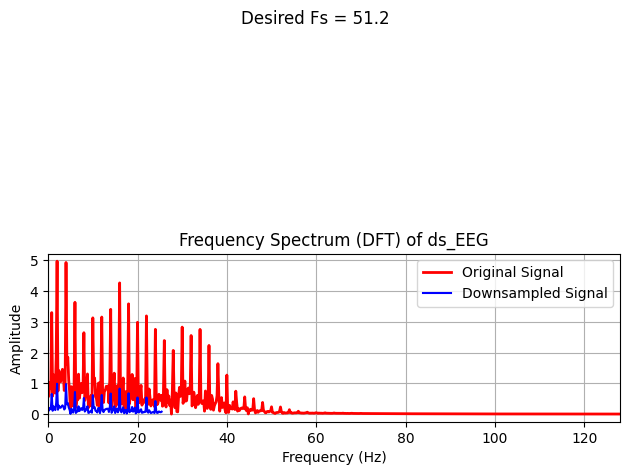

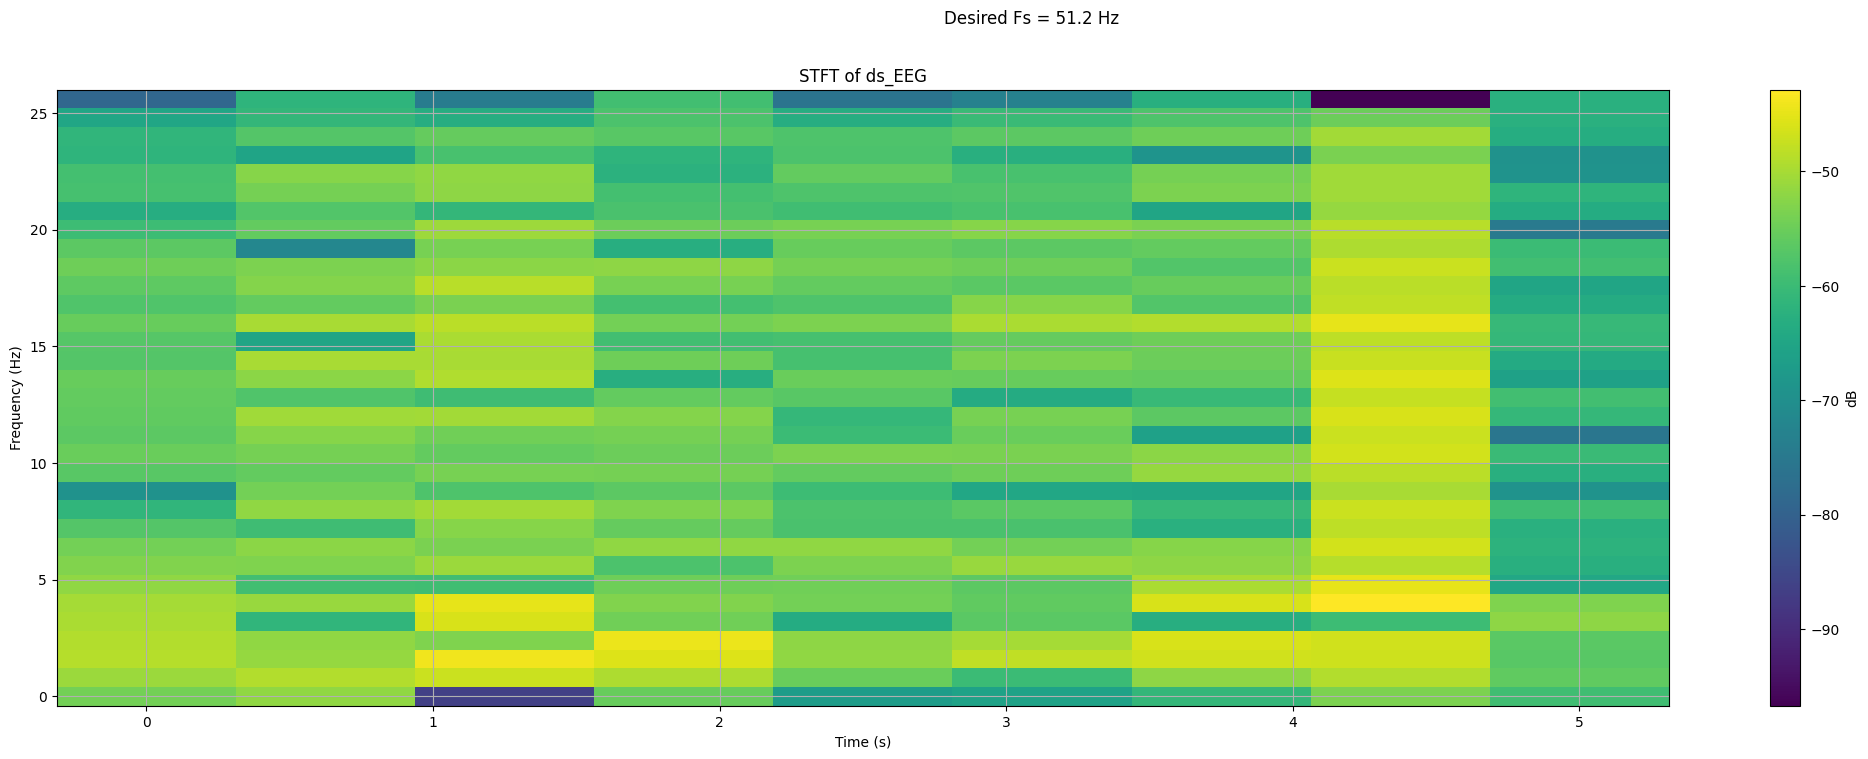

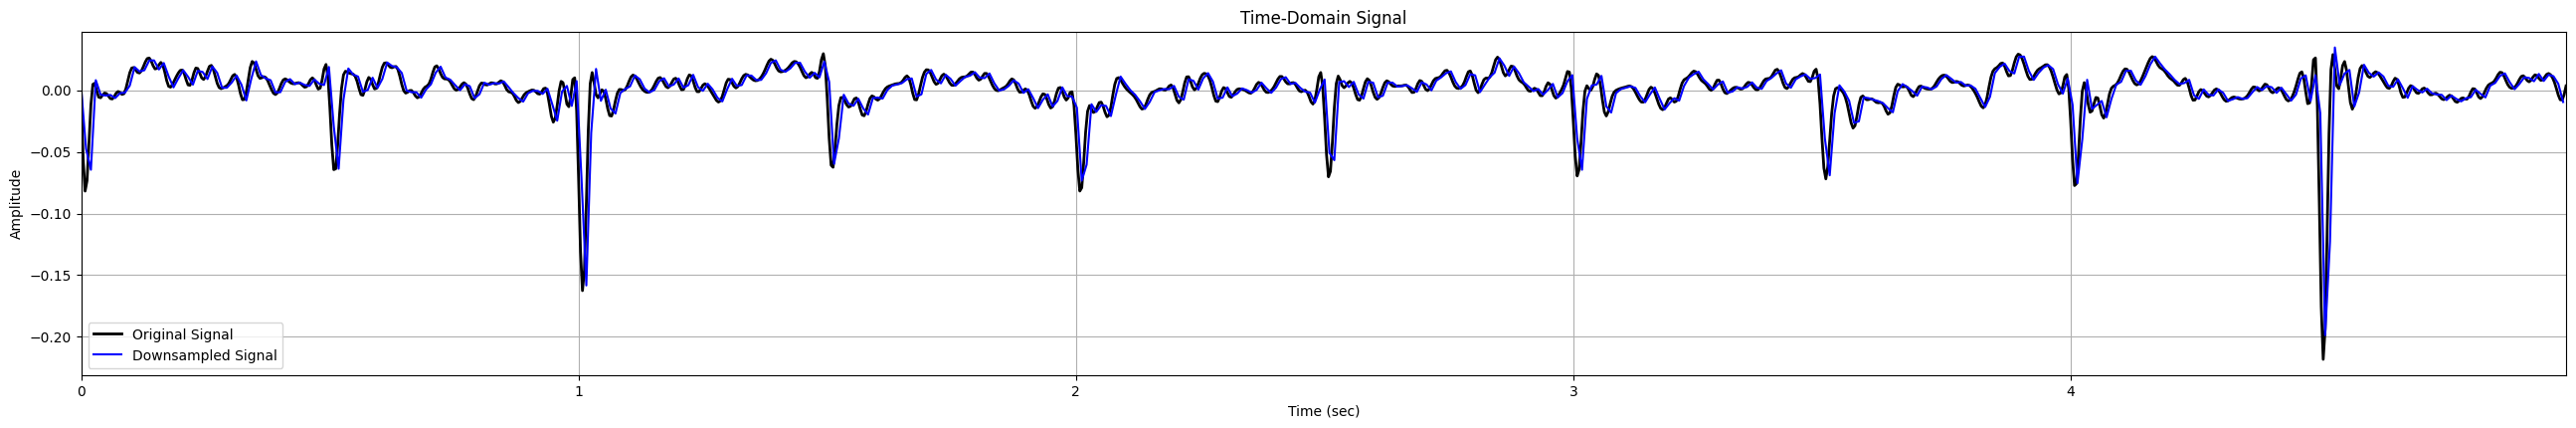

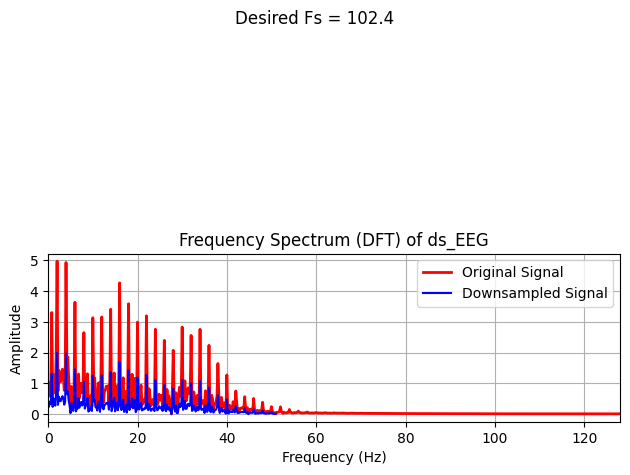

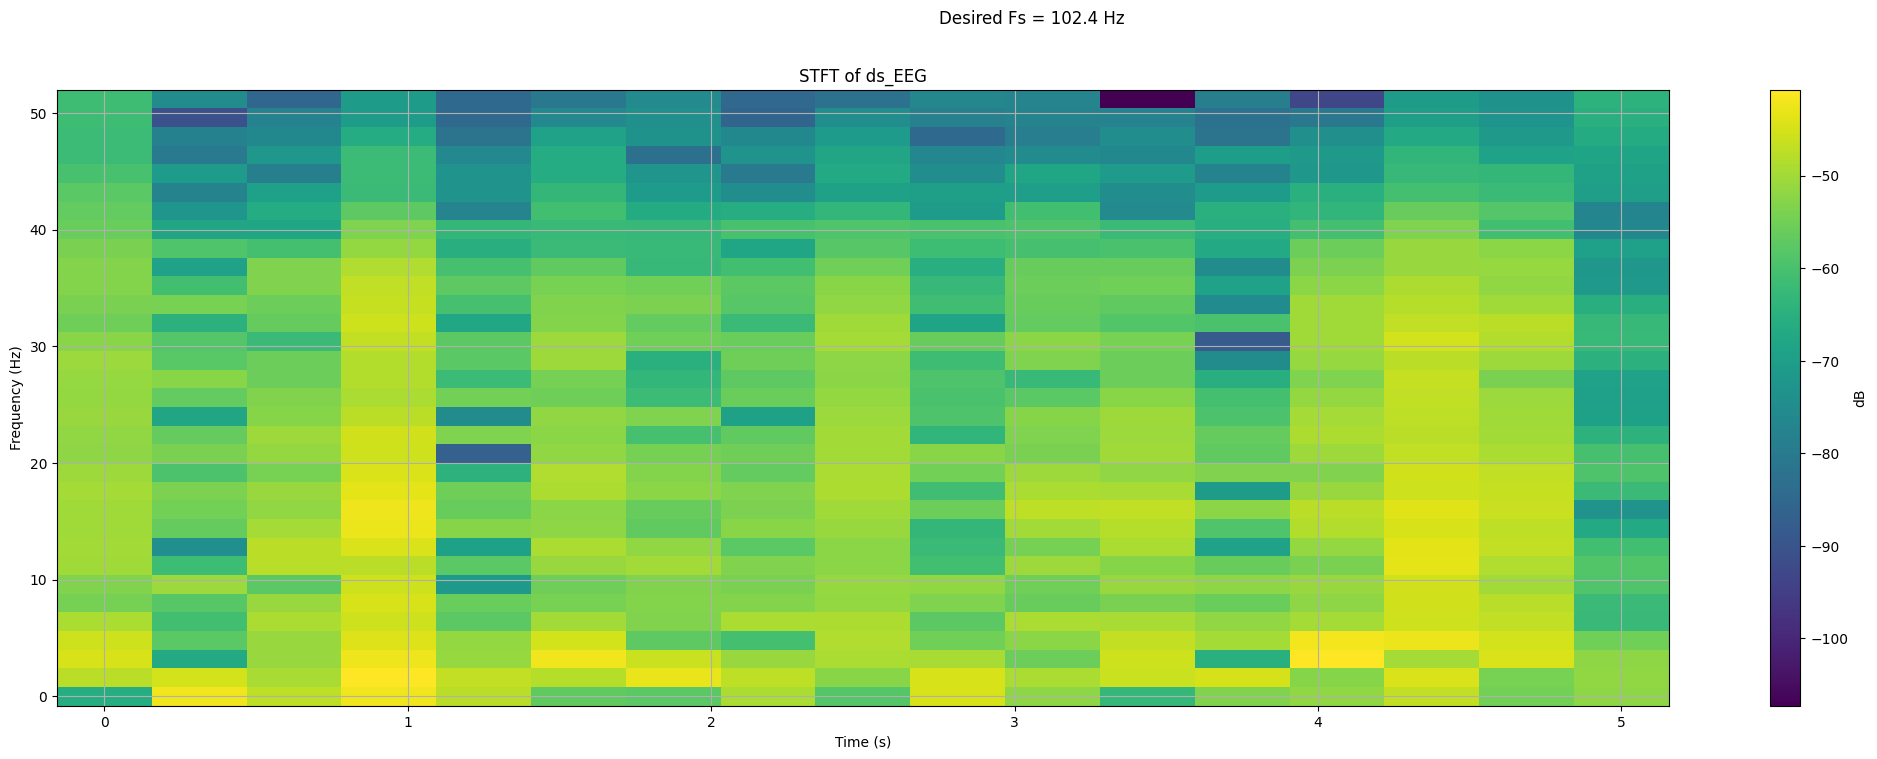

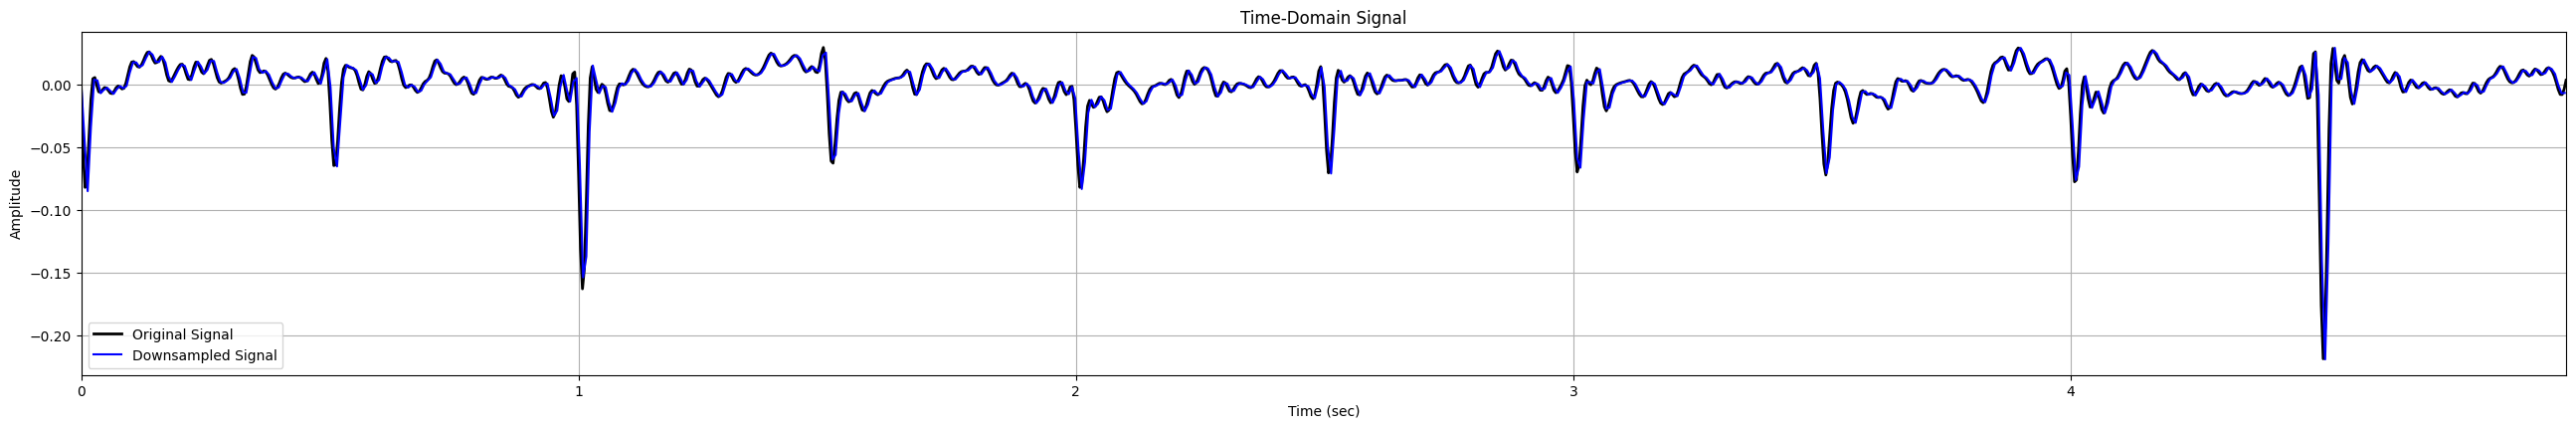

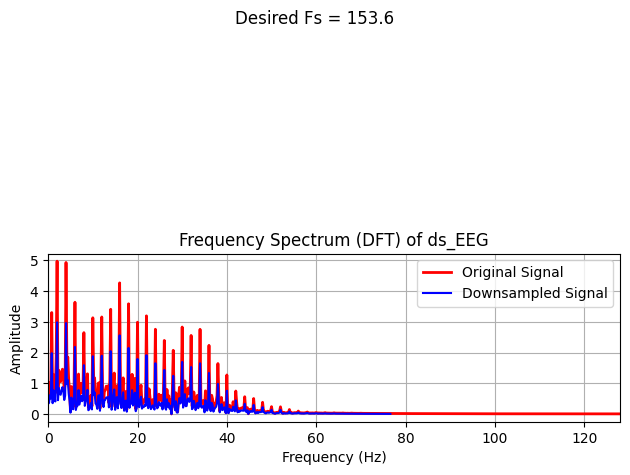

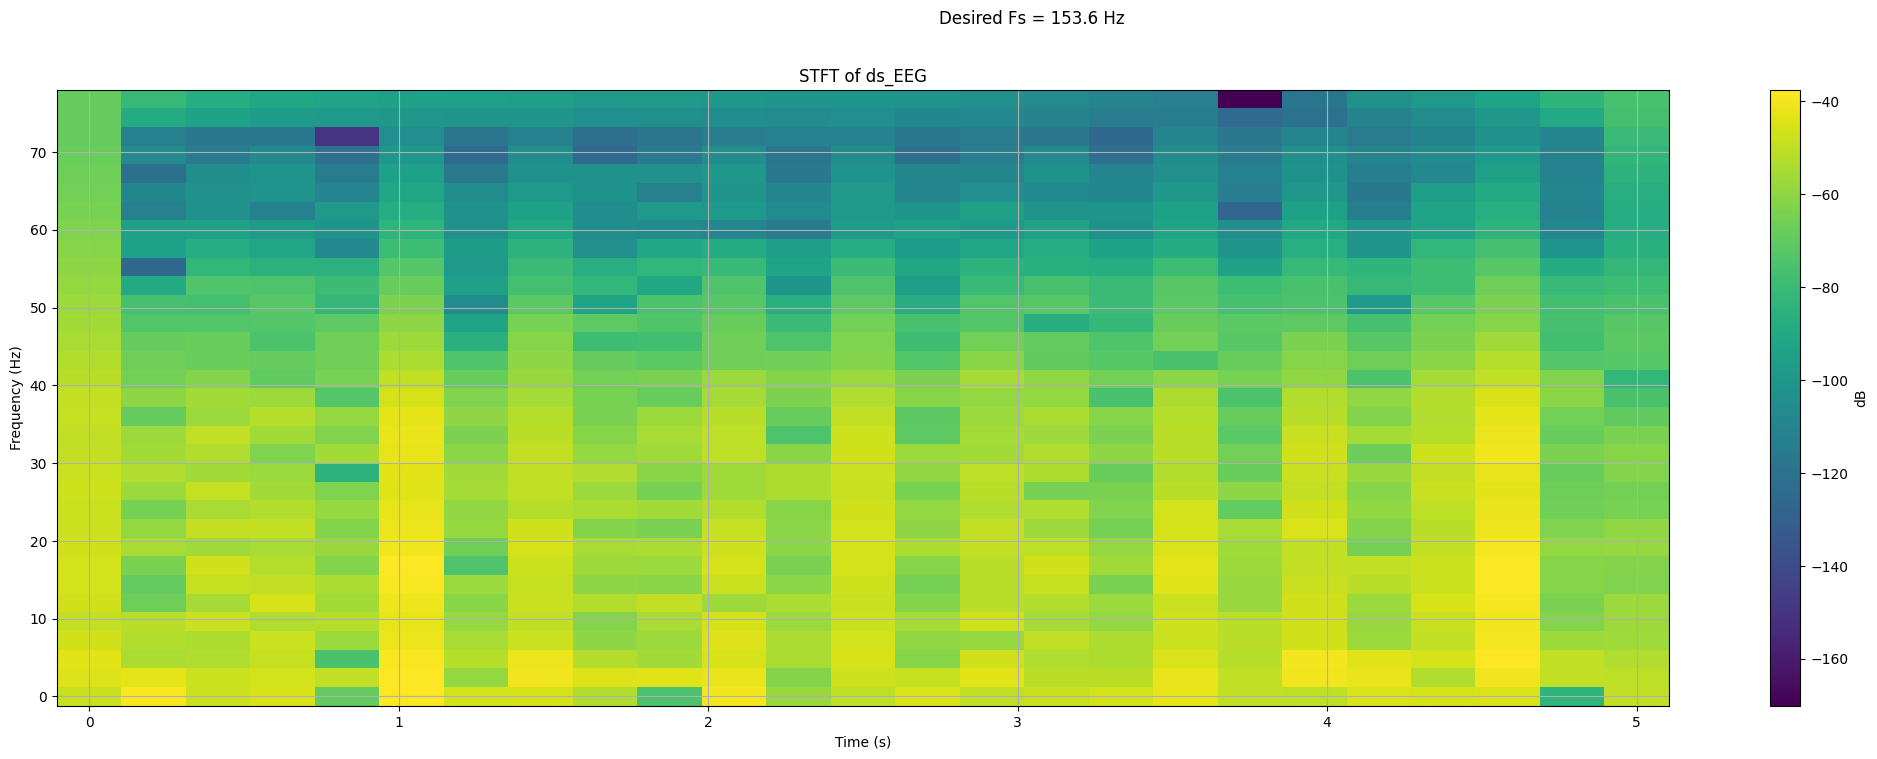

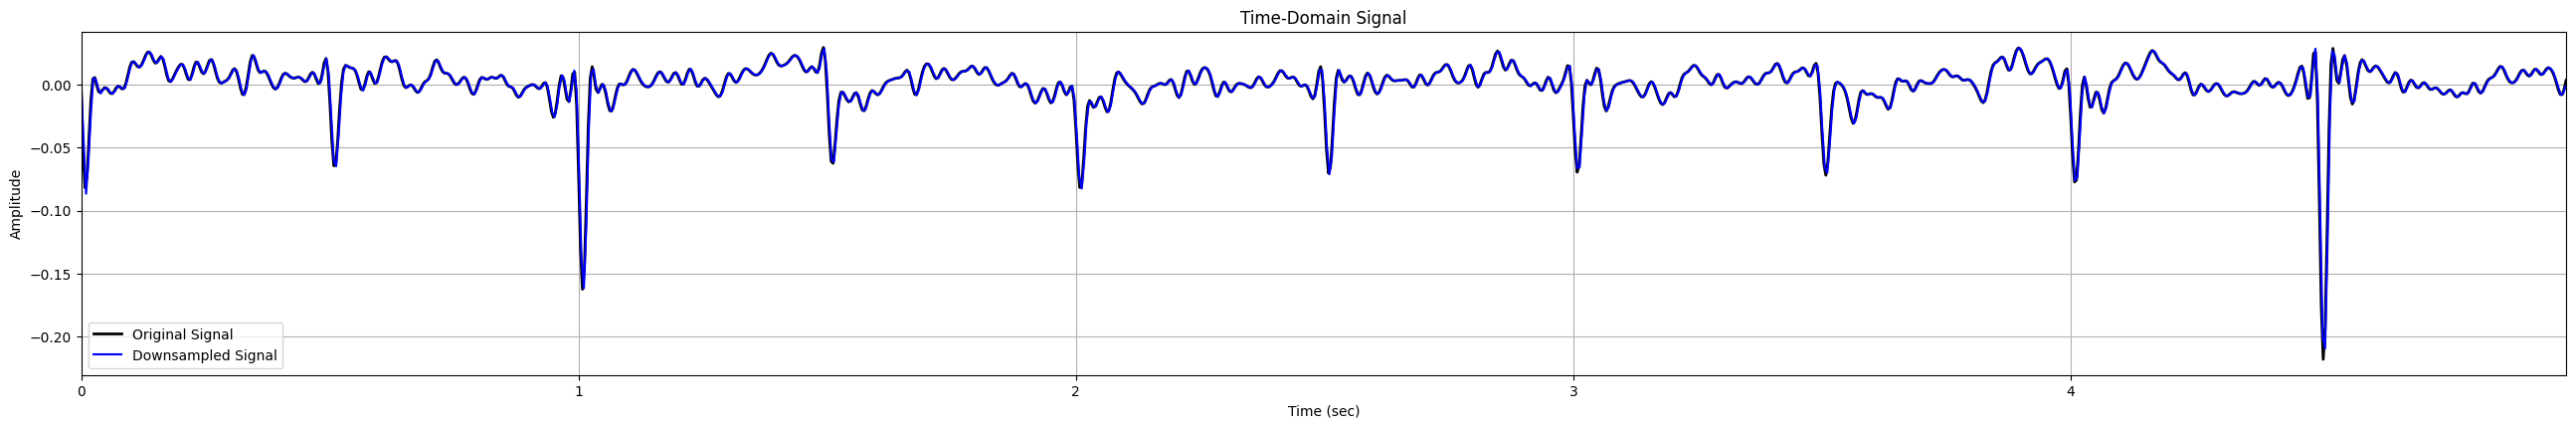

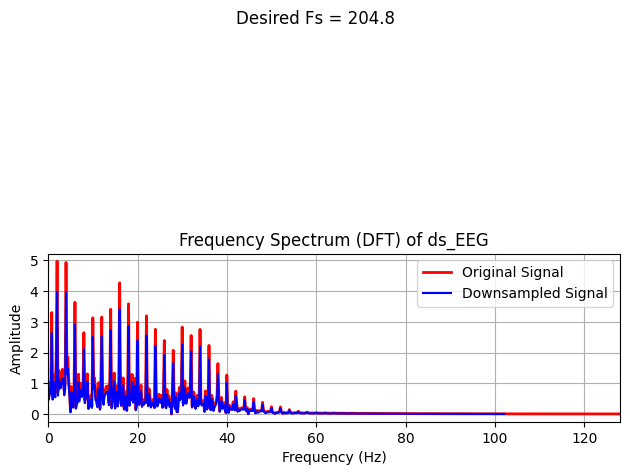

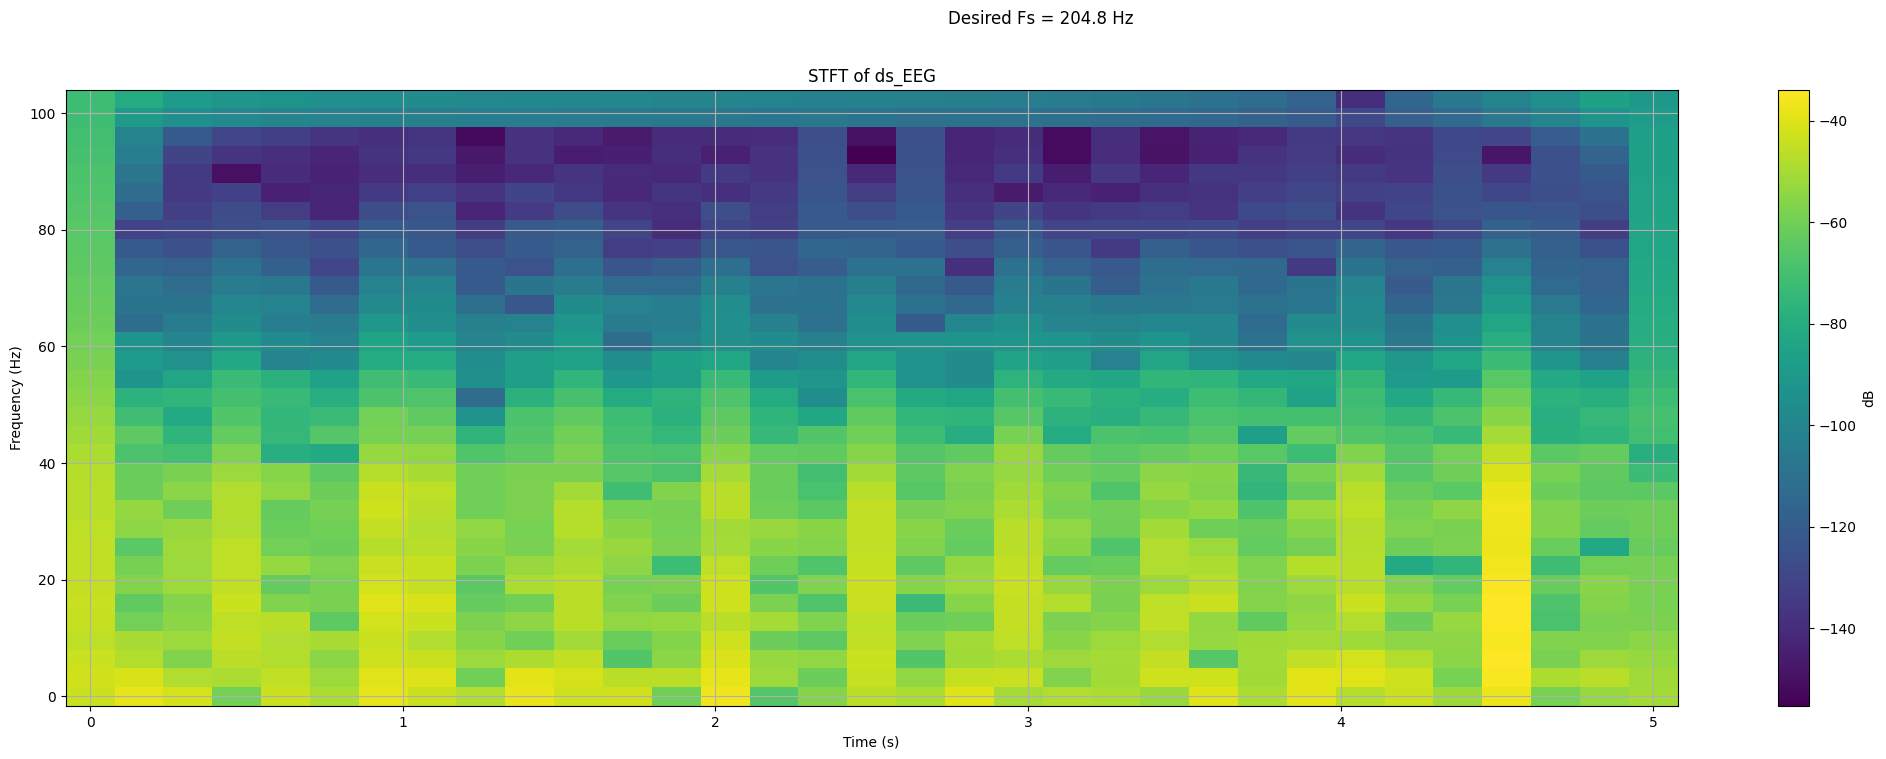

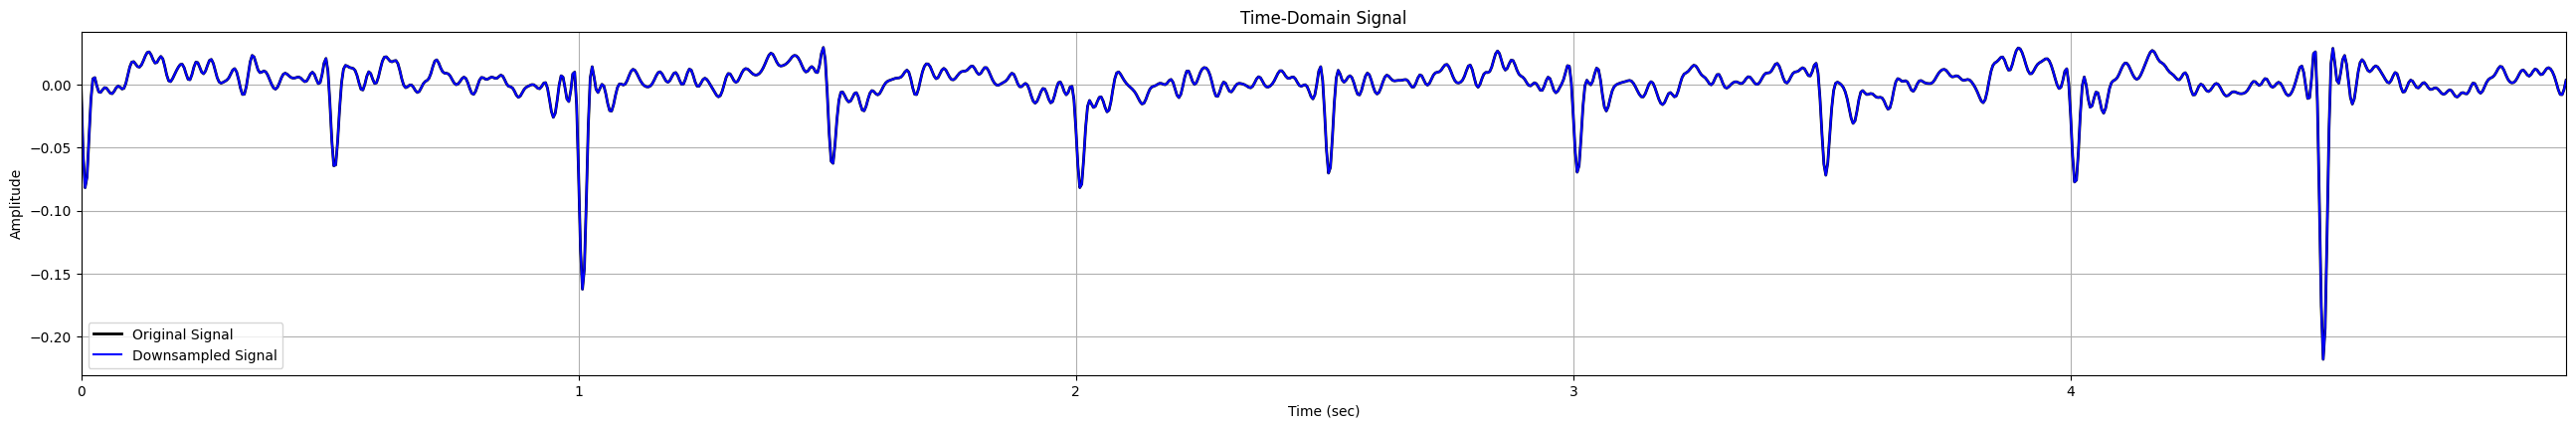

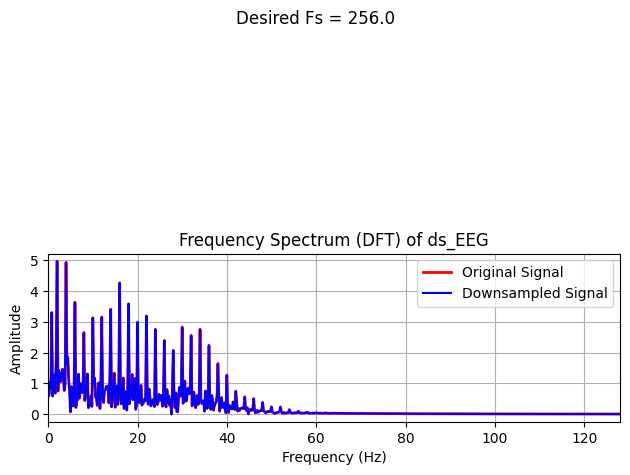

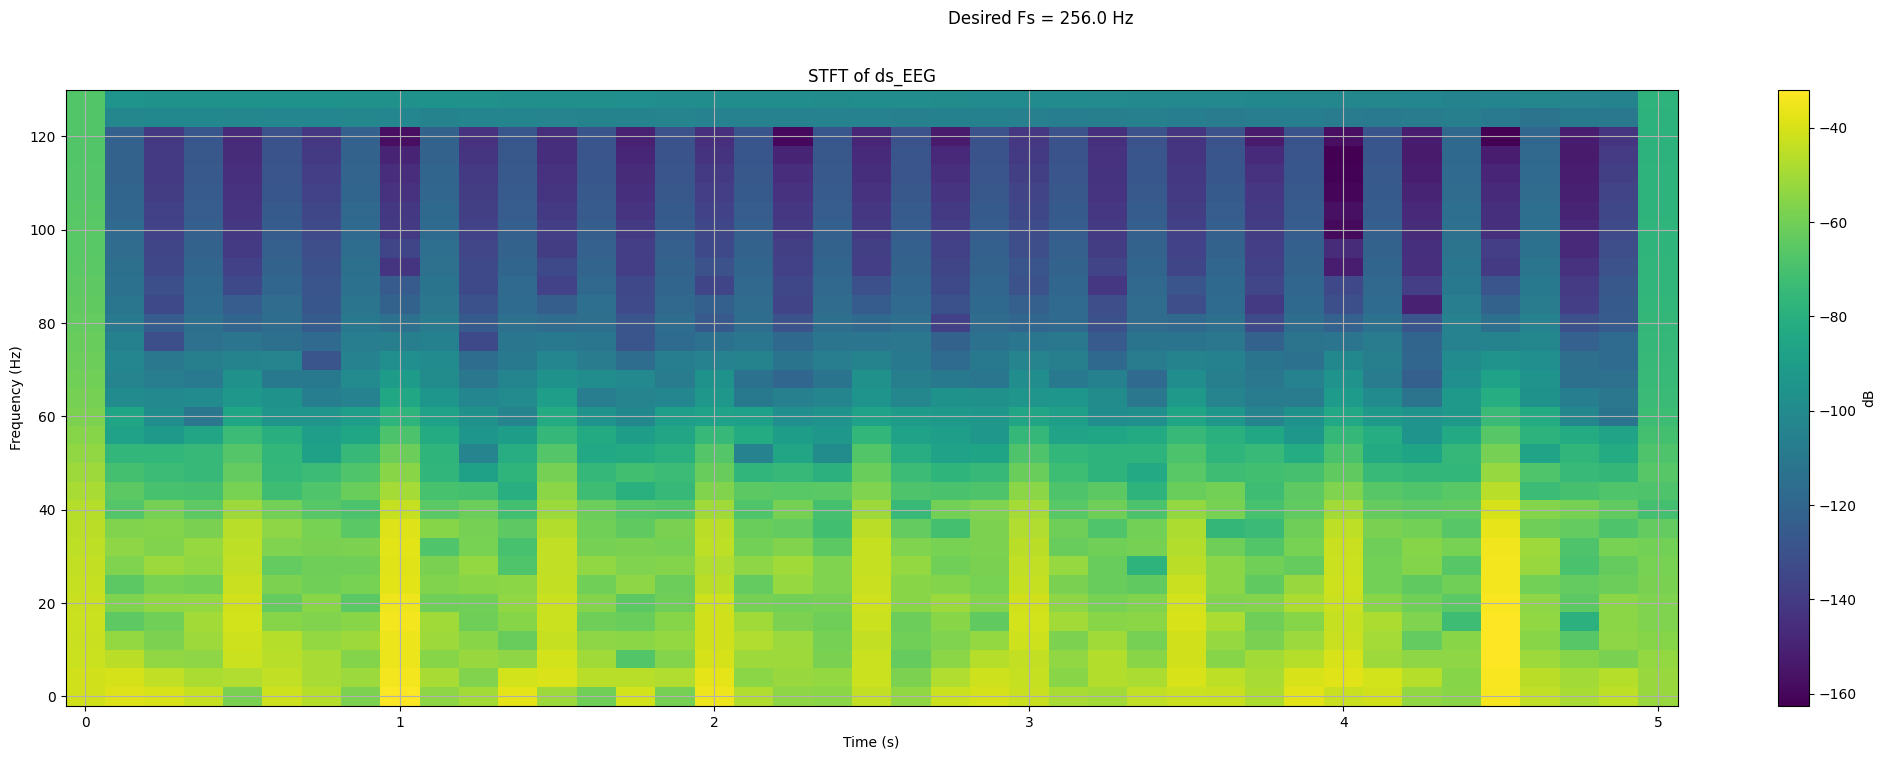

In [25]:

import matplotlib.pyplot as plt
from scipy.signal import chirp, get_window, spectrogram

T = 2.0  # sec
fs = 1000  # Hz
t = np.linspace(0, T, int(T * fs), endpoint=False)
f0 = 100 # Hz
beta = 100
f_t = f0 + beta * t**2

x_t = chirp(t, f0=f0, f1=500, t1=T, method='quadratic')
x_t2= np.cos(2 * np.pi * f_t * t)

plt.figure(figsize=(26, 8))
plt.plot(t, x_t, 'r')
plt.xlabel('Time (sec)')
plt.ylabel('Amp')
plt.title('Chirp Signal x(t)')
plt.grid(True)
plt.xlim([0, 2])
plt.tight_layout()
plt.show()


L = 128
fs = 1000  # Hz
std = 10 # for gaussian

rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

t = np.arange(0, L) / fs

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
plt.plot(t, rectangular_window)
plt.title('Rectangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, triangular_window)
plt.title('Triangular Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 3)
plt.plot(t, gauss_window)
plt.title('Gaussian Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 4)
plt.plot(t, hamming_window)
plt.title('Hamming Window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

def normalized_frequency_axis(N):
    return np.arange(N) / N

N = len(x_t)
plt.figure(figsize=(12, 8))
cnt = 1
names = ["Rectangular", "Triangular", "Gaussian", "Hamming"]
for i in [rectangular_window, triangular_window, gauss_window, hamming_window]:
    X = np.fft.fft(i, N)
    X_mag = np.abs(X)

    X_dB = 20 * np.log10(X_mag) #better visualize the amplitude differences across frequencies

    freq_axis = normalized_frequency_axis(N)

    plt.subplot(2, 2, cnt)
    plt.plot(freq_axis, X_dB)  #This tells us how strong each frequency component is in the signal. A higher amplitude means that frequency is more dominant
    plt.title('{} Window Frequency Transform'.format(names[cnt-1]))
    plt.xlabel('Normalized Frequency (x π rads/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid(True)
    plt.xlim([0, freq_axis[1000]])
    cnt += 1

plt.tight_layout()
plt.show()

noverlap = 0
NFFT = L

plt.figure(figsize=(26, 8))
plt.subplot(2, 2, 1)
f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Rectangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 2)
f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Triangular Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 3)
f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Gaussian Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.subplot(2, 2, 4)
f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.title('Hamming Window Frequency Transform')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label="Power/Frequency (dB/Hz)")

plt.tight_layout()
plt.show()

noverlaps = [0, 64, 127]
NFFT = L

for noverlap in noverlaps:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("N_overlap = {}".format(noverlap))
    plt.tight_layout()
    plt.show()

Ls = [32, 128, 512]

for L in Ls:
    noverlap = L - 1
    NFFT = L
    rectangular_window = get_window('boxcar', L)
    triangular_window = get_window('triang', L)
    gauss_window = get_window(('gaussian', std), L)
    hamming_window = get_window('hamming', L)

    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("L = {}".format(L))
    plt.tight_layout()
    plt.show()

L = 128
NFFTs = [L, 2*L, 4*L]
noverlap = L/2
rectangular_window = get_window('boxcar', L)
triangular_window = get_window('triang', L)
gauss_window = get_window(('gaussian', std), L)
hamming_window = get_window('hamming', L)

for NFFT in NFFTs:
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 2, 1)
    f, t, Sxx = spectrogram(x_t, fs, window=rectangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Rectangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 2)
    f, t, Sxx = spectrogram(x_t, fs, window=triangular_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Triangular Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 3)
    f, t, Sxx = spectrogram(x_t, fs, window=gauss_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Gaussian Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.subplot(2, 2, 4)
    f, t, Sxx = spectrogram(x_t, fs, window=hamming_window, nperseg=L, noverlap=noverlap, nfft=NFFT)
    plt.pcolormesh(t, f, 10 * np.log10(Sxx))
    plt.title('Hamming Window Frequency Transform')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar(label="Power/Frequency (dB/Hz)")

    plt.suptitle("NFFT = {}".format(NFFT))
    plt.tight_layout()
    plt.show()

from scipy.io import loadmat
from scipy.fft import fft
from scipy.signal import stft

# Plot the time-domain signal

fs = 256 #Hz
t = np.arange(0, len(df['Output1'])) / fs

plt.figure(figsize=(10, 4))
plt.plot(t, df['Output1'], 'k')
plt.title("Time-Domain Signal")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, t[-1])
plt.tight_layout()
plt.show()

# Plot the frequency spectrum (DFT)
dft = fft(signal.to_numpy())
n = len(signal)
freq = np.fft.fftfreq(n, 1/fs)
positive_freq_indices = np.where(freq >= 0)
plt.figure(figsize=(10, 4))
plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r')
plt.title("Frequency Spectrum (DFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, fs/2)
plt.tight_layout()
plt.show()

# Plot the STFT
f, t, Zxx = stft(signal, fs=fs, nperseg=64)  # You can adjust nperseg for desired time and frequency resolution
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 20 * np.log10(np.abs(Zxx)))
plt.title("Short-Time Fourier Transform (STFT)")
plt.xlabel("Time (sec)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="dB")
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.signal import butter, lfilter, resample

M = [1, 2, 4, 6, 8, 10]
desireds_fs = np.array(M)*fs/10

for desired_fs in desireds_fs:
    # Define the desired lower sampling rate
    t_signal = np.arange(0, len(signal)) / fs


    # Design a Butterworth low-pass filter
    nyquist = 0.5 * fs
    low_cutoff = 0.4999 * desired_fs
    b, a = butter(3, low_cutoff / nyquist, btype='low')

    # Apply the filter to the original signal
    filtered_signal = lfilter(b, a, signal)

    #  Downsample the filtered signal
    downsampled_signal = resample(filtered_signal, int(len(filtered_signal) * (desired_fs / fs)),)

    #  Plot the time signal, frequency spectrum (DFT), and STFT of the downsampled signal
    # Time signal
    plt.figure(figsize=(26, 8))
    plt.subplot(2, 1, 1)
    plt.plot(t_signal, signal, 'k', label="Original Signal", lw=2)
    plt.plot(np.arange(0, len(downsampled_signal)) / desired_fs, downsampled_signal, c='b', label="Downsampled Signal")
    plt.title("Time-Domain Signal")
    plt.xlabel("Time (sec)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.xlim(0, t_signal[-1])
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Frequency Spectrum (DFT) of ds_EEG
    plt.subplot(2, 1, 2)
    dft = fft(signal.to_numpy())
    n = len(signal)
    freq = np.fft.fftfreq(n, 1/fs)
    positive_freq_indices = np.where(freq >= 0)
    plt.plot(freq[positive_freq_indices], np.abs(dft[positive_freq_indices]), 'r', label="Original Signal", lw=2)
    dft_ds_EEG = fft(downsampled_signal)
    freq_ds_EEG = np.fft.fftfreq(len(downsampled_signal), 1 / desired_fs)
    positive_freq_indices = np.where(freq_ds_EEG >= 0)

    plt.plot(freq_ds_EEG[positive_freq_indices], np.abs(dft_ds_EEG[positive_freq_indices]), c='b', label="Downsampled Signal")
    plt.title("Frequency Spectrum (DFT) of ds_EEG")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.suptitle("Desired Fs = {}".format(desired_fs))
    plt.tight_layout()
    plt.legend()
    plt.xlim(0, fs/2)
    plt.show()

    # STFT of ds_EEG
    f_ds_EEG, t_ds_EEG, Zxx_ds_EEG = stft(downsampled_signal, fs=desired_fs, nperseg=64)
    plt.figure(figsize=(26, 8))
    plt.pcolormesh(t_ds_EEG, f_ds_EEG, 20 * np.log10(np.abs(Zxx_ds_EEG)))
    plt.title("STFT of ds_EEG")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="dB")
    plt.grid(True)
    plt.suptitle("Desired Fs = {} Hz".format(desired_fs))
    plt.show()




